In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from IPython.display import HTML, display
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import json
from datetime import datetime, timedelta, date, time

In [2]:
plt.style.use('dark_background')

# Section 2: Earthquakes DataSets - Data Prep

Loading/reading CSV file with Earthquakes data for year 2019

In [3]:
earth2019 = pd.read_csv('earthquake2019.csv', parse_dates=True)

Checking the first two observations using .head() method

In [4]:
earth2019.head(2)

time  latitude  longitude  depth  mag magType  nst  \
0  2019-01-01T00:04:05.950Z   -14.951   167.2922  40.14  4.8      mb  NaN   
1  2019-01-01T00:21:25.050Z   -34.903  -111.5903  10.00  4.8      mb  NaN   

     gap   dmin   rms  ...                   updated  \
0  114.0  7.128  0.93  ...  2019-03-08T17:50:12.040Z   
1  158.0  7.936  0.46  ...  2019-03-08T17:50:20.040Z   

                        place        type horizontalError depthError  \
0                     Vanuatu  earthquake             5.1        5.7   
1  southern East Pacific Rise  earthquake            14.0        1.9   

   magError  magNst    status  locationSource magSource  
0     0.069    65.0  reviewed              us        us  
1     0.103    29.0  reviewed              us        us  

[2 rows x 22 columns]

Checking if there are any duplicated observations in the dataset:

In [5]:
earth2019_dup = earth2019[earth2019.duplicated()]
print(earth2019_dup)

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, net, id, updated, place, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource]
Index: []

[0 rows x 22 columns]


There are 0 duplicated rows, no action needed. <br>
Checking the size of the dataset using .shape method

In [6]:
earth2019.shape

(94468, 22)

There are 94468 earthquakes recorded of the magnitude 1 and more in year 2019.

I want to remove the last 14 characters from values/dates in column 'time' to bring to the shape: yyyy-mm-dd.<br>
Using lambda function to perform this:

In [7]:
earth2019['time'] = earth2019['time'].map(lambda x: str(x)[:-14])
print(earth2019['time'])

0        2019-01-01
1        2019-01-01
2        2019-01-01
3        2019-01-01
4        2019-01-01
            ...    
94463    2019-10-31
94464    2019-10-31
94465    2019-10-31
94466    2019-10-31
94467    2019-10-31
Name: time, Length: 94468, dtype: object


Converting 'time' column to DateTime datatype.

In [8]:
earth2019['time'] = pd.to_datetime(earth2019['time'])
earth2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94468 entries, 0 to 94467
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             94468 non-null  datetime64[ns]
 1   latitude         94468 non-null  float64       
 2   longitude        94468 non-null  float64       
 3   depth            94468 non-null  float64       
 4   mag              94468 non-null  float64       
 5   magType          94468 non-null  object        
 6   nst              54225 non-null  float64       
 7   gap              70819 non-null  float64       
 8   dmin             69672 non-null  float64       
 9   rms              94466 non-null  float64       
 10  net              94468 non-null  object        
 11  id               94468 non-null  object        
 12  updated          94468 non-null  object        
 13  place            94468 non-null  object        
 14  type             94468 non-null  objec

As the data for 2019 was downloaded in many parts, and then combined manually I want to check if any dates maybe missing.<br>
To do that I need to have column 'time' as index, creating new dataframe 'df_index' with 'time' column as index as I do not want to do this change to our dataset 'earth2019'.

In [9]:
df_index = earth2019.set_index('time')
df_index.head(2)

latitude  longitude  depth  mag magType  nst    gap   dmin   rms  \
time                                                                           
2019-01-01   -14.951   167.2922  40.14  4.8      mb  NaN  114.0  7.128  0.93   
2019-01-01   -34.903  -111.5903  10.00  4.8      mb  NaN  158.0  7.936  0.46   

           net  ...                   updated                       place  \
time            ...                                                         
2019-01-01  us  ...  2019-03-08T17:50:12.040Z                     Vanuatu   
2019-01-01  us  ...  2019-03-08T17:50:20.040Z  southern East Pacific Rise   

                  type horizontalError  depthError  magError  magNst  \
time                                                                   
2019-01-01  earthquake             5.1         5.7     0.069    65.0   
2019-01-01  earthquake            14.0         1.9     0.103    29.0   

              status locationSource magSource  
time                                           
2019-01-01  reviewed             us        us  
2019-01-01  reviewed             us        us  

[2 rows x 21 columns]

Running the following code on the range of dates in the index of the new dataset to see if it will recognise any missing date:

In [10]:
pd.date_range(start = '2019-01-01', end = '2020-01-01' ).difference(df_index.index)

DatetimeIndex(['2020-01-01'], dtype='datetime64[ns]', freq=None)

We can see that we have found correctly as expected the '2020-01-01' as the only missing date.

For the sake of consistency changing the 'time' name to 'date'.

In [11]:
earth2019 = earth2019.rename(columns={'time': 'date'})

Now performing the same steps for the dataset of 2020

In [12]:
earth2020 = pd.read_csv('earthquake2020.csv', parse_dates=True)

In [13]:
earth2020.head(2)

time  latitude  longitude  depth  mag magType  nst  \
0  2020-02-15T23:59:56.448Z   55.7960   162.5664  47.68  4.5      mb  NaN   
1  2020-02-15T23:58:24.814Z  -50.1421    -7.1942  10.00  4.7      mb  NaN   

     gap    dmin   rms  ...                   updated  \
0   85.0   3.599  0.63  ...  2020-05-02T22:09:56.040Z   
1  126.0  21.695  0.68  ...  2020-05-02T22:10:31.040Z   

                                      place        type horizontalError  \
0  48 km S of Ust’-Kamchatsk Staryy, Russia  earthquake             8.7   
1               southern Mid-Atlantic Ridge  earthquake            14.1   

  depthError  magError  magNst    status  locationSource magSource  
0        6.9     0.055    98.0  reviewed              us        us  
1        1.9     0.147    14.0  reviewed              us        us  

[2 rows x 22 columns]

In [14]:
earth2020.shape

(179767, 22)

In [15]:
earth2020_dup = earth2020[earth2020.duplicated()]
print(earth2020_dup)

                            time   latitude   longitude  depth   mag magType  \
137388  2020-01-31T23:50:44.630Z  18.025500  -67.165100   5.00  2.23      md   
137389  2020-01-31T23:49:36.500Z  19.220501 -155.420502  31.99  2.02      md   
137390  2020-01-31T23:42:29.870Z  18.899000  -67.823800  10.00  3.20      md   
137391  2020-01-31T23:37:33.232Z  51.485900 -176.697800  24.60  1.90      ml   
137392  2020-01-31T23:32:51.609Z  38.496100   39.338200  10.00  4.70     mwr   
...                          ...        ...         ...    ...   ...     ...   
177969  2020-01-01T00:09:20.060Z  17.906600  -66.868500   8.00  1.64      md   
177970  2020-01-01T00:05:36.930Z  17.899300  -66.863600   8.00  1.84      md   
177971  2020-01-01T00:05:09.440Z  17.870500  -66.854100   6.00  1.81      md   
177972  2020-01-01T00:03:38.210Z  19.076600  -67.090100   6.00  2.55      md   
177973  2020-01-01T00:01:56.590Z  19.217500  -67.127500  12.00  2.75      md   

         nst    gap     dmin   rms  ...

I have found many duplicates here, now removing them:

In [16]:
earth2020 = earth2020.drop_duplicates()

In [17]:
earth2020_dup1 = earth2020[earth2020.duplicated()]
print(earth2020_dup1)

Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, net, id, updated, place, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource]
Index: []

[0 rows x 22 columns]


In [18]:
earth2020.shape

(139181, 22)

In [19]:
earth2020['time'] = earth2020['time'].map(lambda x: str(x)[:-14])
print(earth2020['time'])

0         2020-02-15
1         2020-02-15
2         2020-02-15
3         2020-02-15
4         2020-02-15
             ...    
179762    2020-05-16
179763    2020-05-16
179764    2020-05-16
179765    2020-05-16
179766    2020-05-16
Name: time, Length: 139181, dtype: object


Converting 'time' column to DateTime datatype.

In [20]:
earth2020['time'] = pd.to_datetime(earth2020['time'])
earth2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139181 entries, 0 to 179766
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   time             139181 non-null  datetime64[ns]
 1   latitude         139181 non-null  float64       
 2   longitude        139181 non-null  float64       
 3   depth            139181 non-null  float64       
 4   mag              139181 non-null  float64       
 5   magType          139180 non-null  object        
 6   nst              72342 non-null   float64       
 7   gap              102031 non-null  float64       
 8   dmin             97570 non-null   float64       
 9   rms              139177 non-null  float64       
 10  net              139181 non-null  object        
 11  id               139181 non-null  object        
 12  updated          139181 non-null  object        
 13  place            139179 non-null  object        
 14  type             139

As the data for 2020 was downloaded in many parts, and then combined manually I want to check if any dates maybe missing.
To do that I need to have column 'time' as index, creating new dataframe 'df_index_2' with 'time' column as index as I do not want to do this change to our dataset 'earth2020'.

In [21]:
df_index_2 = earth2020.set_index('time')
df_index_2.head(2)

latitude  longitude  depth  mag magType  nst    gap    dmin   rms  \
time                                                                            
2020-02-15   55.7960   162.5664  47.68  4.5      mb  NaN   85.0   3.599  0.63   
2020-02-15  -50.1421    -7.1942  10.00  4.7      mb  NaN  126.0  21.695  0.68   

           net  ...                   updated  \
time            ...                             
2020-02-15  us  ...  2020-05-02T22:09:56.040Z   
2020-02-15  us  ...  2020-05-02T22:10:31.040Z   

                                               place        type  \
time                                                               
2020-02-15  48 km S of Ust’-Kamchatsk Staryy, Russia  earthquake   
2020-02-15               southern Mid-Atlantic Ridge  earthquake   

           horizontalError  depthError  magError  magNst    status  \
time                                                                 
2020-02-15             8.7         6.9     0.055    98.0  reviewed   
2020-02-15            14.1         1.9     0.147    14.0  reviewed   

           locationSource magSource  
time                                 
2020-02-15             us        us  
2020-02-15             us        us  

[2 rows x 21 columns]

Running the following code on the range of dates in the index of the new dataset to see if it will recognise any missing date:

In [22]:
pd.date_range(start = '2020-01-01', end = '2021-01-01' ).difference(df_index_2.index)

DatetimeIndex(['2021-01-01'], dtype='datetime64[ns]', freq=None)

We can see that we have found correctly as expected the '2021-01-01' as the only missing date.

Changing the column name 'time' to 'date':

In [23]:
earth2020 = earth2020.rename(columns={'time': 'date'})


Double checking if the earth2020 hasn't been reindexed:

In [24]:
earth2020.head(2)

date  latitude  longitude  depth  mag magType  nst    gap    dmin  \
0 2020-02-15   55.7960   162.5664  47.68  4.5      mb  NaN   85.0   3.599   
1 2020-02-15  -50.1421    -7.1942  10.00  4.7      mb  NaN  126.0  21.695   

    rms  ...                   updated  \
0  0.63  ...  2020-05-02T22:09:56.040Z   
1  0.68  ...  2020-05-02T22:10:31.040Z   

                                      place        type horizontalError  \
0  48 km S of Ust’-Kamchatsk Staryy, Russia  earthquake             8.7   
1               southern Mid-Atlantic Ridge  earthquake            14.1   

  depthError  magError  magNst    status  locationSource magSource  
0        6.9     0.055    98.0  reviewed              us        us  
1        1.9     0.147    14.0  reviewed              us        us  

[2 rows x 22 columns]

Creating new data frame for the 2019-2020

Concatenating earth2019 & earth2020 into one frame:

In [25]:
frames = [earth2019, earth2020]

In [26]:
earthquakes19_20 = pd.concat(frames)

In [27]:
earthquakes19_20.head(2)

date  latitude  longitude  depth  mag magType  nst    gap   dmin  \
0 2019-01-01   -14.951   167.2922  40.14  4.8      mb  NaN  114.0  7.128   
1 2019-01-01   -34.903  -111.5903  10.00  4.8      mb  NaN  158.0  7.936   

    rms  ...                   updated                       place  \
0  0.93  ...  2019-03-08T17:50:12.040Z                     Vanuatu   
1  0.46  ...  2019-03-08T17:50:20.040Z  southern East Pacific Rise   

         type horizontalError depthError  magError  magNst    status  \
0  earthquake             5.1        5.7     0.069    65.0  reviewed   
1  earthquake            14.0        1.9     0.103    29.0  reviewed   

   locationSource magSource  
0              us        us  
1              us        us  

[2 rows x 22 columns]

In [28]:
earthquakes19_20.shape

(233649, 22)

We have identified that 'id' should be unique identifier of Earthquake record, in case of our data its not and its causing issues in later stage of our data preperation part, we are dropping 17k of observations as they are duplicated earthquakes instances. 

In [29]:
dup_id = earthquakes19_20.duplicated(subset='id')

In [30]:
dup_id.value_counts()

False    216505
True      17144
dtype: int64

In [31]:
earthquakes19_20 = earthquakes19_20.drop_duplicates(['id'],keep= 'first')

Checking if there are missing values:

In [32]:
earthquakes19_20.isnull().sum()

date                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                1
nst                94538
gap                56551
dmin               62003
rms                    6
net                    0
id                     0
updated                0
place                  2
type                   0
horizontalError    76005
depthError             6
magError           67199
magNst             66465
status                 0
locationSource         0
magSource              0
dtype: int64

We have identified that features with missing values as those that are not physical parameters/atributes of earthquake itself but related to the way how data got recoreded, in this case they do not bring value to our study. We are dropping them from DF.

In [33]:
earthquakes19_20 = earthquakes19_20.drop(['nst','rms', 'gap','dmin', 
                                          'horizontalError', 'depthError','magError', 'magNst'], axis=1)

In [34]:
earthquakes19_20.isnull().sum()

date              0
latitude          0
longitude         0
depth             0
mag               0
magType           1
net               0
id                0
updated           0
place             2
type              0
status            0
locationSource    0
magSource         0
dtype: int64

We are left with two rows with missing values, I will drop them from dataframe:

In [35]:
earthquakes19_20 = earthquakes19_20.dropna(axis=0)

In [36]:
earthquakes19_20.tail(2)

date  latitude  longitude  depth  mag magType net          id  \
179765 2020-05-16   44.4533  -115.2160  11.18  2.6      ml  us  us70009hik   
179766 2020-05-16   36.3245    71.3863  92.15  4.2      mb  us  us70009hi8   

                         updated                                place  \
179765  2020-08-02T00:30:45.040Z           34 km NW of Stanley, Idaho   
179766  2020-08-02T00:30:46.040Z  41 km SSW of Ashk?sham, Afghanistan   

              type    status locationSource magSource  
179765  earthquake  reviewed             us        us  
179766  earthquake  reviewed             us        us

In [37]:
earthquakes19_20 = earthquakes19_20.reset_index()

In [38]:
earthquakes19_20.shape

(216502, 15)

In [39]:
earthquakes19_20 = earthquakes19_20.rename(columns={'latitude': 'Latitude', 'longitude':'Longitude'})

Visualisation of all events on scatter plot

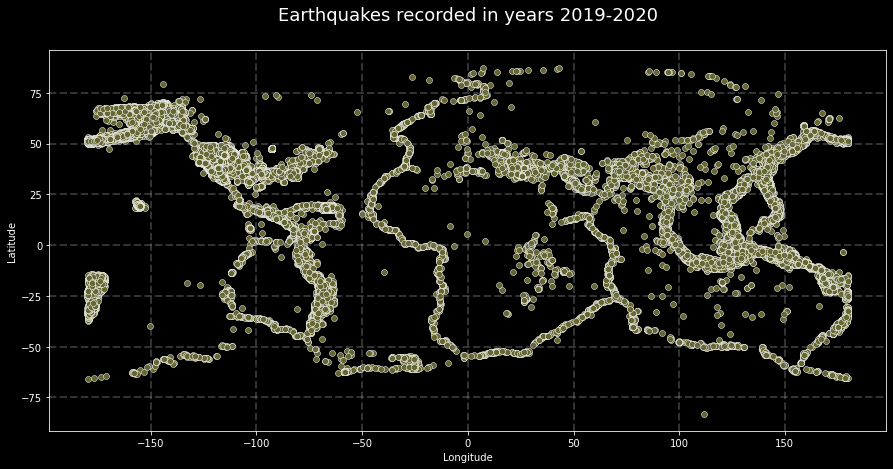

In [40]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=earthquakes19_20, y='Latitude', x='Longitude', color='#666633')  
plt.grid(color='grey', linestyle='--', linewidth=2, alpha=0.4)
plt.title('Earthquakes recorded in years 2019-2020', fontsize=18, pad=30)
plt.show() 

Distribution of events based on the magnitude:

Text(0.5, 1.0, 'Number of Earthquakes by Magnitude')

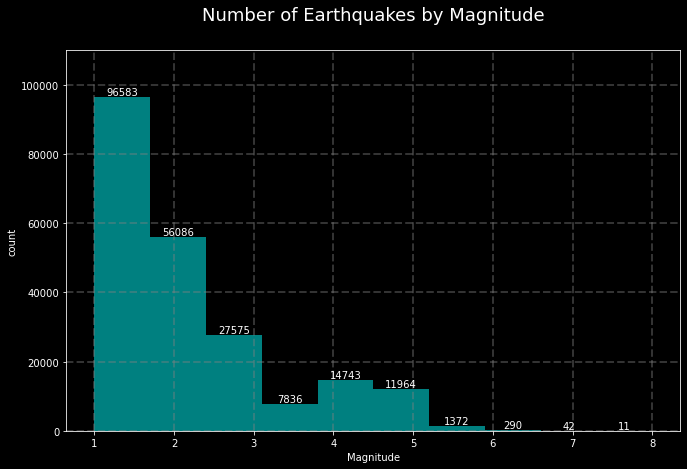

In [41]:
plt.figure(figsize=(11,7))
counts, edges, bars = plt.hist(earthquakes19_20['mag'], bins=10, color='#008080')
plt.grid(color='grey', linestyle='--', linewidth=2, alpha=0.4)
plt.bar_label(bars)
plt.ylim(0, 110000)
plt.xlabel('Magnitude')
plt.ylabel('count')
plt.title('Number of Earthquakes by Magnitude', fontsize=18, pad=30)

Text(0.5, 1.0, 'Number of Earthquakes by Depth')

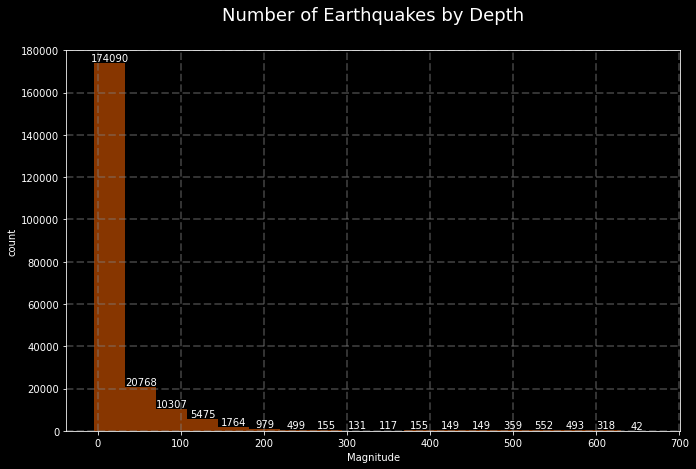

In [42]:
plt.figure(figsize=(11,7))
counts, edges, bars = plt.hist(earthquakes19_20['depth'], bins=18, color='#873600')
plt.grid(color='grey', linestyle='--', linewidth=2, alpha=0.4)
plt.bar_label(bars)
plt.ylim(0, 180000)
plt.xlabel('Magnitude')
plt.ylabel('count')
plt.title('Number of Earthquakes by Depth', fontsize=18, pad=30)

Based on the research we have learned that the most relevant earthquakes are those of magnitude over 5, lets see how many of them are:

Creating reduced Eearthquake dataset with mag over 5 only to use for visualisations.

In [43]:
earthquakes19_20_small = earthquakes19_20[(earthquakes19_20['mag']>=5)]

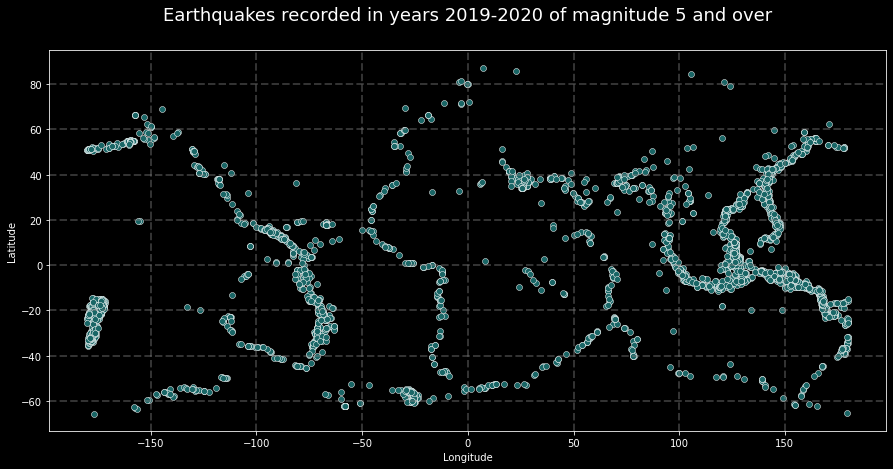

In [44]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=earthquakes19_20_small, y='Latitude', x='Longitude', color='#196666') 
plt.grid(color='grey', linestyle='--', linewidth=2, alpha=0.4)
plt.title('Earthquakes recorded in years 2019-2020 of magnitude 5 and over', fontsize=18, pad=30)
plt.show() 

# Section 3: Volcanoes DataSets - Data Prep

In [45]:
volcano_df = pd.read_excel('Volcanos_Eruption_Results.xlsx')

In [46]:
volcano_df.head(2)

Volcano Number Volcano Name  Eruption Number   Eruption Category  \
0          332010      Kilauea            22416  Confirmed Eruption   
1          383010     La Palma            22417  Confirmed Eruption   

  Area of Activity  VEI VEI Modifier Start Year Modifier  Start Year  \
0              NaN  NaN          NaN                 NaN      2021.0   
1              NaN  NaN          NaN                 NaN      2021.0   

   Start Year Uncertainty  ...  Evidence Method (dating) End Year Modifier  \
0                     NaN  ...   Historical Observations                 >   
1                     NaN  ...   Historical Observations                 >   

   End Year  End Year Uncertainty End Month End Day Modifier  End Day  \
0    2021.0                   NaN      10.0              NaN     14.0   
1    2021.0                   NaN      10.0              NaN     14.0   

   End Day Uncertainty  Latitude Longitude  
0                  NaN    19.421  -155.287  
1                  NaN    28.570   -17.830  

[2 rows x 24 columns]

In [47]:
volcano_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11222 entries, 0 to 11221
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Volcano Number            11222 non-null  int64  
 1   Volcano Name              11222 non-null  object 
 2   Eruption Number           11222 non-null  int64  
 3   Eruption Category         11222 non-null  object 
 4   Area of Activity          4696 non-null   object 
 5   VEI                       8322 non-null   float64
 6   VEI Modifier              1310 non-null   object 
 7   Start Year Modifier       1611 non-null   object 
 8   Start Year                11220 non-null  float64
 9   Start Year Uncertainty    2095 non-null   float64
 10  Start Month               11022 non-null  float64
 11  Start Day Modifier        415 non-null    object 
 12  Start Day                 11019 non-null  float64
 13  Start Day Uncertainty     858 non-null    float64
 14  Eviden

For purpose of our study the relavant features for us are only: the geo locations, date, name, volcano identification:  therefore we are removing all the rest from the dataset:

In [48]:
volcano_df = volcano_df.drop(columns = ['Area of Activity', 'VEI', 'VEI Modifier',
                                        'Start Year Modifier', 'Start Year Uncertainty',
                                        'Start Day Modifier', 'Start Day Uncertainty',
                                        'End Year Modifier', 'End Year Uncertainty',
                                        'End Day Modifier', 'End Day Uncertainty', 'Evidence Method (dating)', 'End Year', 
                                        'End Month', 'End Day'] )

In [49]:
volcano_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11222 entries, 0 to 11221
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Volcano Number     11222 non-null  int64  
 1   Volcano Name       11222 non-null  object 
 2   Eruption Number    11222 non-null  int64  
 3   Eruption Category  11222 non-null  object 
 4   Start Year         11220 non-null  float64
 5   Start Month        11022 non-null  float64
 6   Start Day          11019 non-null  float64
 7   Latitude           11222 non-null  float64
 8   Longitude          11222 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 789.2+ KB


We are interested in events occured in years 2019-2020, we will need to filter out that data for those years only:

In [50]:
volcano19_20 = volcano_df[(volcano_df['Start Year'] > 2018) & (volcano_df['Start Year'] < 2021)]

In [51]:
volcano19_20.head(2)

Volcano Number           Volcano Name  Eruption Number  \
22          263250                 Merapi            22381   
23          360150  Soufriere St. Vincent            22385   

     Eruption Category  Start Year  Start Month  Start Day  Latitude  \
22  Confirmed Eruption      2020.0         12.0       31.0     -7.54   
23  Confirmed Eruption      2020.0         12.0       27.0     13.33   

    Longitude  
22    110.446  
23    -61.180

In [52]:
volcano19_20.tail(2)

Volcano Number Volcano Name  Eruption Number   Eruption Category  \
74          345040         Poas            22303  Confirmed Eruption   
75          261080     Sinabung            22316  Confirmed Eruption   

    Start Year  Start Month  Start Day  Latitude  Longitude  
74      2019.0          2.0        7.0     10.20    -84.233  
75      2019.0          2.0        6.0      3.17     98.392

In [53]:
volcano19_20.isnull().sum()

Volcano Number       0
Volcano Name         0
Eruption Number      0
Eruption Category    0
Start Year           0
Start Month          0
Start Day            0
Latitude             0
Longitude            0
dtype: int64

Creating column Date, with the date format yyyy-mm-dd

In [54]:
volcano19_20 = volcano19_20.rename(columns={'Start Year': 'year', 'Start Month':'month', 'Start Day':'day'})

In [55]:
volcano19_20['date'] =pd.to_datetime(volcano19_20[['day', 'month', 'year' ]], yearfirst=False)

In [56]:
volcano19_20.head(2)

Volcano Number           Volcano Name  Eruption Number  \
22          263250                 Merapi            22381   
23          360150  Soufriere St. Vincent            22385   

     Eruption Category    year  month   day  Latitude  Longitude       date  
22  Confirmed Eruption  2020.0   12.0  31.0     -7.54    110.446 2020-12-31  
23  Confirmed Eruption  2020.0   12.0  27.0     13.33    -61.180 2020-12-27

In [57]:
volcano19_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 22 to 75
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Volcano Number     54 non-null     int64         
 1   Volcano Name       54 non-null     object        
 2   Eruption Number    54 non-null     int64         
 3   Eruption Category  54 non-null     object        
 4   year               54 non-null     float64       
 5   month              54 non-null     float64       
 6   day                54 non-null     float64       
 7   Latitude           54 non-null     float64       
 8   Longitude          54 non-null     float64       
 9   date               54 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 4.6+ KB


We are left with 54 volcanoes eruptions during those two years.

Visualisation of Volanoes occurances

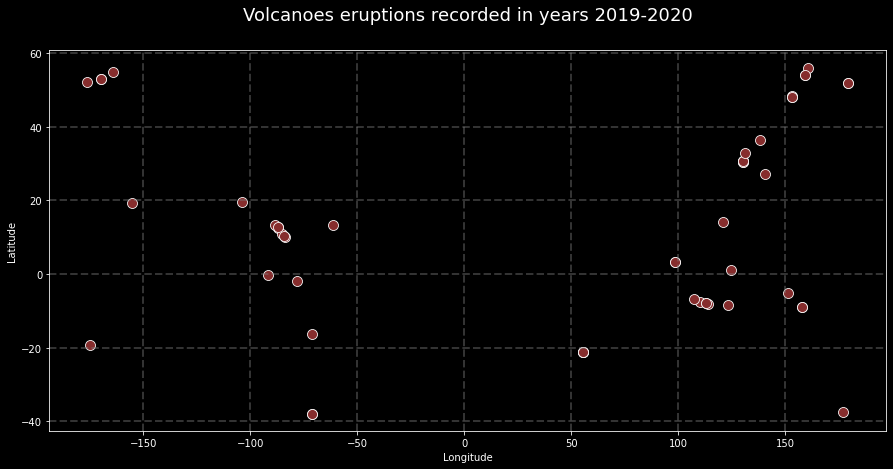

In [58]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=volcano19_20, y='Latitude', x='Longitude', color='#862d2d', s=100) 
plt.grid(color='grey', linestyle='--', linewidth=2, alpha=0.4)
plt.title('Volcanoes eruptions recorded in years 2019-2020', fontsize=18, pad=30)
plt.show() 

In [59]:
volcano19_20.to_csv('volcano19_20.csv')

Visualisation of both earthquakes over 5 mag and volcanoes on the map using Bokeh library:

In [60]:
from bokeh.tile_providers import get_provider, WIKIMEDIA, CARTODBPOSITRON, STAMEN_TERRAIN, STAMEN_TONER, ESRI_IMAGERY, OSM, Vendors
from bokeh.io import output_notebook, show
import bokeh.palettes
from bokeh.themes import built_in_themes
from bokeh.io import curdoc
from bokeh.plotting import figure, output_file, ColumnDataSource, save
from bokeh.transform import factor_cmap
from bokeh.models import LinearInterpolator, HoverTool
from bokeh.models import Text, Plot, Slider, ColumnDataSource, Select, SingleIntervalTicker, DateRangeSlider, Circle, Range1d, HoverTool, LinearAxis
import warnings
warnings.filterwarnings("ignore")
output_notebook()

Loading BokehJS ...

To make sure that coordinates are in the same EPSG form: calling a 'Proj class' instance with the arguments lon and lat - it will convert lon/lat (in degrees) to x/y native map projection coordinates (in meters).

In [61]:
#!pip install pyproj

In [62]:
from pyproj import Proj, transform

inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')

world_lon1, world_lat1 = transform(outProj,inProj,-160,-80)
world_lon2, world_lat2 = transform(outProj,inProj,160,80)

In [63]:
lons, lats = [], []
for lon, lat in list(zip(volcano19_20["Longitude"], volcano19_20["Latitude"])):
    x, y = transform(outProj,inProj,lon,lat)
    lons.append(x)
    lats.append(y)

Creating new columns with converted lons and lats:

In [64]:
volcano19_20["MercatorX"] = lons
volcano19_20["MercatorY"] = lats

In [65]:
lons, lats = [], []
for lon, lat in list(zip(earthquakes19_20_small["Longitude"], earthquakes19_20_small["Latitude"])):
    x, y = transform(outProj,inProj,lon,lat)
    lons.append(x)
    lats.append(y)

Creating new columns with converted lons and lats:

In [66]:
earthquakes19_20_small["MercatorX"] = lons
earthquakes19_20_small["MercatorY"] = lats

Plotting them on the map using Bokeh library and tile provider Cartodbpositron:

In [67]:
tile_provider = get_provider(CARTODBPOSITRON)
output_file('Geological_Disasters.html')
curdoc().theme = 'dark_minimal'

p = figure(plot_width=900, plot_height=500,
           x_range=(world_lon1, world_lon2), y_range=(world_lat1, world_lat2),
           x_axis_type="mercator", y_axis_type="mercator",
           tools="pan, box_select, zoom_in, zoom_out, save, reset",
           title='Earthquakes and Volcanoes eruptions years 2019-2020')
          
p.add_tile(tile_provider)

# 1
p.circle(x="MercatorX", y="MercatorY",size=12,fill_color="purple", line_color="purple",
                  source=volcano19_20)

#2
p.circle(x="MercatorX", y="MercatorY", size=3,fill_color="orange", line_color="orange",
         line_alpha=0.5,fill_alpha=0.5,source=earthquakes19_20_small)
show(p)
save(p)

'C:\\Users\\sylwi\\OneDrive\\Projects_ML_DA\\Earthquakes_Volcanoes\\Geological_Disasters.html'

# Section 4: Data Labelling

#### 1. Finding earthquake/volcano match (7 days, 1500km)

##### First creating 7 Volcano datasets with diffrent dates: current, -1 day, -2 days, -3 days, -4 days, -5 days, -6 days

In [68]:
volcano19_20_current_date = volcano19_20.drop(['MercatorX', 'MercatorY'], axis=1)

In [69]:
volcano19_20_minus_1 = volcano19_20_current_date.reindex()
volcano19_20_minus_1['date'] = volcano19_20_current_date['date'] - timedelta(1)
volcano19_20_minus_2 = volcano19_20_current_date.reindex()
volcano19_20_minus_2['date'] = volcano19_20_minus_2['date'] - timedelta(2)
volcano19_20_minus_3 = volcano19_20_current_date.reindex()
volcano19_20_minus_3['date'] = volcano19_20_minus_3['date'] - timedelta(3)
volcano19_20_minus_4 = volcano19_20_current_date.reindex()
volcano19_20_minus_4['date'] = volcano19_20_minus_4['date'] - timedelta(4)
volcano19_20_minus_5 = volcano19_20_current_date.reindex()
volcano19_20_minus_5['date'] = volcano19_20_minus_5['date'] - timedelta(5)
volcano19_20_minus_6 = volcano19_20_current_date.reindex()
volcano19_20_minus_6['date'] = volcano19_20_minus_6['date'] - timedelta(6)

##### Concatenating all 7 of them to get one Volcanoes datasets with erruptions within 7 days range.

In [70]:
vol_all_dates_7 = pd.concat([volcano19_20_current_date,volcano19_20_minus_1, volcano19_20_minus_2, volcano19_20_minus_3, volcano19_20_minus_4, volcano19_20_minus_5, volcano19_20_minus_6], axis=0, ignore_index=False)

##### By running the head of dataset and sorting by Eruption Number we can confirm that single instance of Volcano has been recorded 7 times, 7 days in a row:

In [71]:
vol_all_dates_7.sort_values('Eruption Number').head(14)

Volcano Number     Volcano Name  Eruption Number   Eruption Category  \
74          345040             Poas            22303  Confirmed Eruption   
74          345040             Poas            22303  Confirmed Eruption   
74          345040             Poas            22303  Confirmed Eruption   
74          345040             Poas            22303  Confirmed Eruption   
74          345040             Poas            22303  Confirmed Eruption   
74          345040             Poas            22303  Confirmed Eruption   
74          345040             Poas            22303  Confirmed Eruption   
72          263310  Tengger Caldera            22306  Confirmed Eruption   
72          263310  Tengger Caldera            22306  Confirmed Eruption   
72          263310  Tengger Caldera            22306  Confirmed Eruption   
72          263310  Tengger Caldera            22306  Confirmed Eruption   
72          263310  Tengger Caldera            22306  Confirmed Eruption   
72          263310  Tengger Caldera            22306  Confirmed Eruption   
72          263310  Tengger Caldera            22306  Confirmed Eruption   

      year  month   day  Latitude  Longitude       date  
74  2019.0    2.0   7.0    10.200    -84.233 2019-02-04  
74  2019.0    2.0   7.0    10.200    -84.233 2019-02-07  
74  2019.0    2.0   7.0    10.200    -84.233 2019-02-03  
74  2019.0    2.0   7.0    10.200    -84.233 2019-02-05  
74  2019.0    2.0   7.0    10.200    -84.233 2019-02-02  
74  2019.0    2.0   7.0    10.200    -84.233 2019-02-01  
74  2019.0    2.0   7.0    10.200    -84.233 2019-02-06  
72  2019.0    2.0  18.0    -7.942    112.950 2019-02-13  
72  2019.0    2.0  18.0    -7.942    112.950 2019-02-16  
72  2019.0    2.0  18.0    -7.942    112.950 2019-02-15  
72  2019.0    2.0  18.0    -7.942    112.950 2019-02-14  
72  2019.0    2.0  18.0    -7.942    112.950 2019-02-17  
72  2019.0    2.0  18.0    -7.942    112.950 2019-02-18  
72  2019.0    2.0  18.0    -7.942    112.950 2019-02-12

##### Confirming that Volcanos of 54 has been multiplied by 7 and giving us 378 records:

In [72]:
vol_all_dates_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 22 to 75
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Volcano Number     378 non-null    int64         
 1   Volcano Name       378 non-null    object        
 2   Eruption Number    378 non-null    int64         
 3   Eruption Category  378 non-null    object        
 4   year               378 non-null    float64       
 5   month              378 non-null    float64       
 6   day                378 non-null    float64       
 7   Latitude           378 non-null    float64       
 8   Longitude          378 non-null    float64       
 9   date               378 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 32.5+ KB


##### Now merging the Volcano dataset with Earthquake dataset with Magnitude over 5 on common column 'date' to find match.

In [73]:
df_7 = pd.merge(earthquakes19_20,vol_all_dates_7, how='inner', on = 'date' )

##### Data from both datasets has been joined, we have now features related to Earthquakes on Volcanoes in one dataset.<br>
##### By having this we will be able to calculate distance between both events.

In [74]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110426 entries, 0 to 110425
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              110426 non-null  int64         
 1   date               110426 non-null  datetime64[ns]
 2   Latitude_x         110426 non-null  float64       
 3   Longitude_x        110426 non-null  float64       
 4   depth              110426 non-null  float64       
 5   mag                110426 non-null  float64       
 6   magType            110426 non-null  object        
 7   net                110426 non-null  object        
 8   id                 110426 non-null  object        
 9   updated            110426 non-null  object        
 10  place              110426 non-null  object        
 11  type               110426 non-null  object        
 12  status             110426 non-null  object        
 13  locationSource     110426 non-null  object  

In [75]:
df_7.head(2)

index       date  Latitude_x  Longitude_x  depth  mag magType net  \
0   2894 2019-01-31     62.9525    -148.2066   61.9  2.3      ml  ak   
1   2895 2019-01-31     62.8649    -149.8367   75.3  2.2      ml  ak   

             id                   updated  ... magSource Volcano Number  \
0  ak0191f9pr12  2019-02-15T22:28:18.678Z  ...        ak         261080   
1  ak0191f9psg6  2019-02-15T22:28:48.377Z  ...        ak         261080   

  Volcano Name Eruption Number   Eruption Category    year month  day  \
0     Sinabung           22316  Confirmed Eruption  2019.0   2.0  6.0   
1     Sinabung           22316  Confirmed Eruption  2019.0   2.0  6.0   

  Latitude_y  Longitude_y  
0       3.17       98.392  
1       3.17       98.392  

[2 rows x 24 columns]

##### Confirming data integrity by checking if there are any duplicates for 'id' of earthquake and eruption number of volcano:

##### We want to make sure that we are not reporting on same event twice.

In [76]:
duplicated = df_7[df_7.duplicated(subset=['id','Eruption Number'], keep=False)]
duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              0 non-null      int64         
 1   date               0 non-null      datetime64[ns]
 2   Latitude_x         0 non-null      float64       
 3   Longitude_x        0 non-null      float64       
 4   depth              0 non-null      float64       
 5   mag                0 non-null      float64       
 6   magType            0 non-null      object        
 7   net                0 non-null      object        
 8   id                 0 non-null      object        
 9   updated            0 non-null      object        
 10  place              0 non-null      object        
 11  type               0 non-null      object        
 12  status             0 non-null      object        
 13  locationSource     0 non-null      object        
 14  magSource          0 n

##### Implementing the distance calculation solution based on approach used by Radečić (2020).        <br>

In [77]:
# Define a function to calculate the distance based on Latitude and Longitude.
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [78]:
distances_km = []
for row in df_7.itertuples(index=False):
   distances_km.append(
       haversine_distance(row.Latitude_x, row.Longitude_x, row.Latitude_y, row.Longitude_y)
   )

##### Inserting new column where the distance in km will be stored:

In [79]:
df_7['DistanceBetweenValcanoAndEarthquake'] = distances_km

In [80]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110426 entries, 0 to 110425
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   index                                110426 non-null  int64         
 1   date                                 110426 non-null  datetime64[ns]
 2   Latitude_x                           110426 non-null  float64       
 3   Longitude_x                          110426 non-null  float64       
 4   depth                                110426 non-null  float64       
 5   mag                                  110426 non-null  float64       
 6   magType                              110426 non-null  object        
 7   net                                  110426 non-null  object        
 8   id                                   110426 non-null  object        
 9   updated                              110426 non-null  object        
 

##### We are now checking how many volcanoes errupted witin 7 days from Earthquake within 1500km from each other:

In [81]:
df_7_result = df_7[(df_7['DistanceBetweenValcanoAndEarthquake'] <=1500)]

##### Out of 110k earthquakes of mag 5+, 2565 meet the criteria of a volcano occuring within 7 days and 1500 km

In [82]:
df_7_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2565 entries, 214 to 110409
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   index                                2565 non-null   int64         
 1   date                                 2565 non-null   datetime64[ns]
 2   Latitude_x                           2565 non-null   float64       
 3   Longitude_x                          2565 non-null   float64       
 4   depth                                2565 non-null   float64       
 5   mag                                  2565 non-null   float64       
 6   magType                              2565 non-null   object        
 7   net                                  2565 non-null   object        
 8   id                                   2565 non-null   object        
 9   updated                              2565 non-null   object        
 10  place   

##### List of those Volcanoes with number of occurances:

In [83]:
df_7_result['Volcano Name'].value_counts()

Shishaldin                667
Cleveland                 328
Soufriere St. Vincent     285
Semisopochnoi             237
Kilauea                   168
Great Sitkin              100
Ulawun                     76
Karymsky                   58
Taal                       55
Kikai                      51
Kavachi                    44
Rincon de la Vieja         43
Asosan                     37
Kuchinoerabujima           37
Lewotolok                  33
Sinabung                   31
Klyuchevskoy               30
Soputan                    27
Tengger Caldera            26
Lateiki                    25
Nishinoshima               24
San Cristobal              22
Sarychev Peak              18
Raung                      17
Copahue                    14
Fournaise, Piton de la     14
Poas                       12
Whakaari/White Island      10
Asamayama                  10
Tangkuban Parahu            9
Merapi                      9
Telica                      8
Turrialba                   8
Ubinas    

##### Visualisation of 2565 earthquakes that have relation with Volcano's eruption that happend within 7 days time range from shake and within distance of 1.5k km from each other:

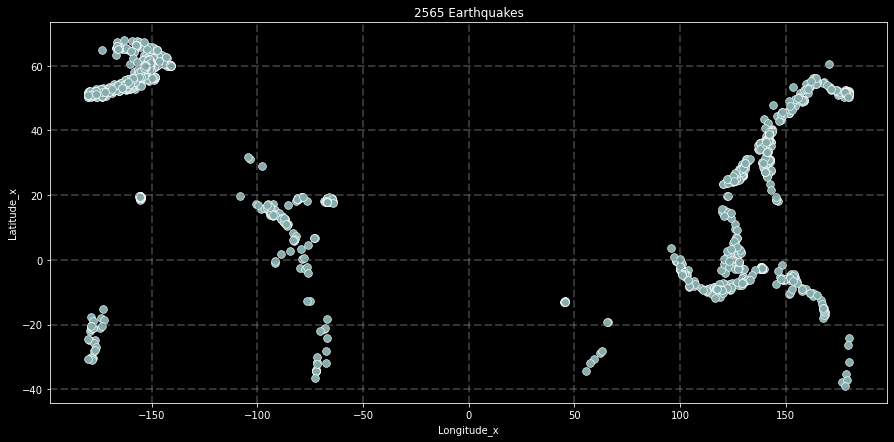

In [84]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_7_result, x='Longitude_x', y='Latitude_x' , color='#85adad', s=60) 
plt.grid(color='grey', linestyle='--', linewidth=2, alpha=0.4)
plt.title('2565 Earthquakes')
plt.show() 

In [85]:
fig = px.scatter_mapbox(df_7_result,
                        lat="Latitude_x",
                        lon="Longitude_x",
                        hover_name="place",
                        hover_data=["place"],
                        color="mag",
                        zoom=1,
                        size="mag",
                        height=500,
                        opacity=0.4,
                        width=950, color_continuous_scale='BrBG', color_continuous_midpoint=5)
fig.update_layout(mapbox_style='carto-darkmatter')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_style='carto-darkmatter', title={
        'text': "Related events",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, 
        font=dict(family="Courier New, monospace",size=18,color="darkgrey"))
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="Related events based on date and distance")
fig.show()

##### Assigning True or False label to the Earthquake19_20 dataset, creating target column;

In [86]:
# To store all results
vol_match = []

# looping over all id's in Earthquake dataset
for id in earthquakes19_20['id']:
    # and add True if match found in the result DF, False if it was not:
    vol_match.append(id in df_7_result['id'].unique())
                        

# And convert that to a pandas format
earthquakes19_20['vol_match'] = vol_match

###### The whole Earthquake dataset has 2558 True labels and 213k False:

In [87]:
earthquakes19_20['vol_match'].value_counts()

False    213944
True       2558
Name: vol_match, dtype: int64

In [88]:
# earthquakes19_20.to_excel('Labeled_Earthquake_DF.xlsx')

Based on our research we learned that most likely only strong Earthquakes of Mag 7 and over may lead to Volcano Eruption. <br>
The study is new and there are diffrences in opinion among scholars. <br>

In our case, the period that we study does not have enough cases with strong magnitudes, therefore we have decided to filter our data with all earthques of Magnitude 5 and over.

In [89]:
earthquakes_final_7 = earthquakes19_20[(earthquakes19_20['mag'] >=5)]

##### Our final dataset that we will use for Machine Learning purposes will have 3061 observations. <br>
##### 74 of them will be Positive case, rest Negative.

In [90]:
earthquakes_final_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3061 entries, 9 to 216474
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           3061 non-null   int64         
 1   date            3061 non-null   datetime64[ns]
 2   Latitude        3061 non-null   float64       
 3   Longitude       3061 non-null   float64       
 4   depth           3061 non-null   float64       
 5   mag             3061 non-null   float64       
 6   magType         3061 non-null   object        
 7   net             3061 non-null   object        
 8   id              3061 non-null   object        
 9   updated         3061 non-null   object        
 10  place           3061 non-null   object        
 11  type            3061 non-null   object        
 12  status          3061 non-null   object        
 13  locationSource  3061 non-null   object        
 14  magSource       3061 non-null   object        
 15  vo

In [91]:
earthquakes_final_7['vol_match'].value_counts()

False    2987
True       74
Name: vol_match, dtype: int64

In [92]:
earth_true_7 = earthquakes_final_7[(earthquakes_final_7['vol_match'] == True)]

##### Geospatial visualisation of Earthquakes that are of Mag 5 and over and have parameters that may allow to lead to Volcano Eruption.

In [93]:
fig = px.scatter_mapbox(earth_true_7,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="place",
                        hover_data=["place"],
                        color='mag',
                        zoom=1,
                        size='mag',
                        height=500,
                        opacity=0.4,
                        width=950, color_continuous_scale='BrBG')
fig.update_layout(mapbox_style='carto-darkmatter', title={
        'text': "Earthquakes that may leads to Volcano Eruption",
        'y':0.9,'x':0.4,'xanchor': 'center','yanchor': 'top'}, 
        font=dict(family="Courier New, monospace",size=18,color="darkgrey"))
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

fig.write_html("Earthquakes_that_leads_volcanoes.html")
fig.show()


##### Double checking if we are working with Earthquake event type only.

In [94]:
earthquakes_final_7['type'].value_counts()

earthquake    3061
Name: type, dtype: int64

##### Fixing indexes:

In [95]:
earthquakes_final_7 = earthquakes_final_7.drop(['index'], axis=1)
earthquakes_final_7 = earthquakes_final_7.reset_index(drop=True)

In [96]:
earthquakes_final_7.head(2)

date  Latitude  Longitude  depth  mag magType net           id  \
0 2019-01-01   61.2975  -149.9523  44.40  5.0      ml  ak  ak0191pccr7   
1 2019-01-01   -9.5818   122.6874  62.72  5.0     mww  us   us2000iznk   

                    updated                                place        type  \
0  2019-12-16T03:37:30.673Z  7 km SSE of Point MacKenzie, Alaska  earthquake   
1  2019-03-08T17:50:13.040Z     118 km SSE of Maumere, Indonesia  earthquake   

     status locationSource magSource  vol_match  
0  reviewed             ak        ak      False  
1  reviewed             us        us      False

In [97]:
earthquakes_final_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3061 non-null   datetime64[ns]
 1   Latitude        3061 non-null   float64       
 2   Longitude       3061 non-null   float64       
 3   depth           3061 non-null   float64       
 4   mag             3061 non-null   float64       
 5   magType         3061 non-null   object        
 6   net             3061 non-null   object        
 7   id              3061 non-null   object        
 8   updated         3061 non-null   object        
 9   place           3061 non-null   object        
 10  type            3061 non-null   object        
 11  status          3061 non-null   object        
 12  locationSource  3061 non-null   object        
 13  magSource       3061 non-null   object        
 14  vol_match       3061 non-null   bool          
dtypes: b

magType : “Md”, “Ml”, “Ms”, “Mw”, “Me”, “Mi”, “Mb”, “MLg”, The method or algorithm used to calculate the preferred magnitude for the event. Directly link to the mag of the earthquake.<br>
net: ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw, The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.<br>
id: A unique identifier for the event. This is the current preferred id for the event, and may change over time. <br>
updated: Time when the event was most recently updated.<br>
place: Textual description of named geographic region near to the event. <br>
type: “earthquake”, “quarry” <br>
status: “automatic”, “reviewed”, “deleted”, Status is either automatic or reviewed. Automatic events are directly posted by automatic processing systems and have not been verified or altered by a human. Reviewed events have been looked at by a human. The level of review can range from a quick validity check to a careful reanalysis of the event. <br>
locationSource: ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw The network that originally authored the reported location of this event.<br>
magSource: ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw, Network that originally authored the reported magnitude for this event. <br>



Due to the fact that the features of object type has no link to the size, strenght or location of the events, I will drop them from the dataset.

In [98]:
earthquakes19_20_ML_7 = earthquakes_final_7.drop(['magType', 'net', 'id', 'updated', 'place', 'type', 'status', 
                                          'locationSource','magSource','date'], axis=1)

In [99]:
earthquakes19_20_ML_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   3061 non-null   float64
 1   Longitude  3061 non-null   float64
 2   depth      3061 non-null   float64
 3   mag        3061 non-null   float64
 4   vol_match  3061 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 98.8 KB


##### Changing datatype from bool to integer by assigning False to 0 and True to 1.

In [100]:
earthquakes19_20_ML_7.replace({False: 0, True: 1}, inplace=True)

In [101]:
earthquakes19_20_ML_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   3061 non-null   float64
 1   Longitude  3061 non-null   float64
 2   depth      3061 non-null   float64
 3   mag        3061 non-null   float64
 4   vol_match  3061 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 119.7 KB


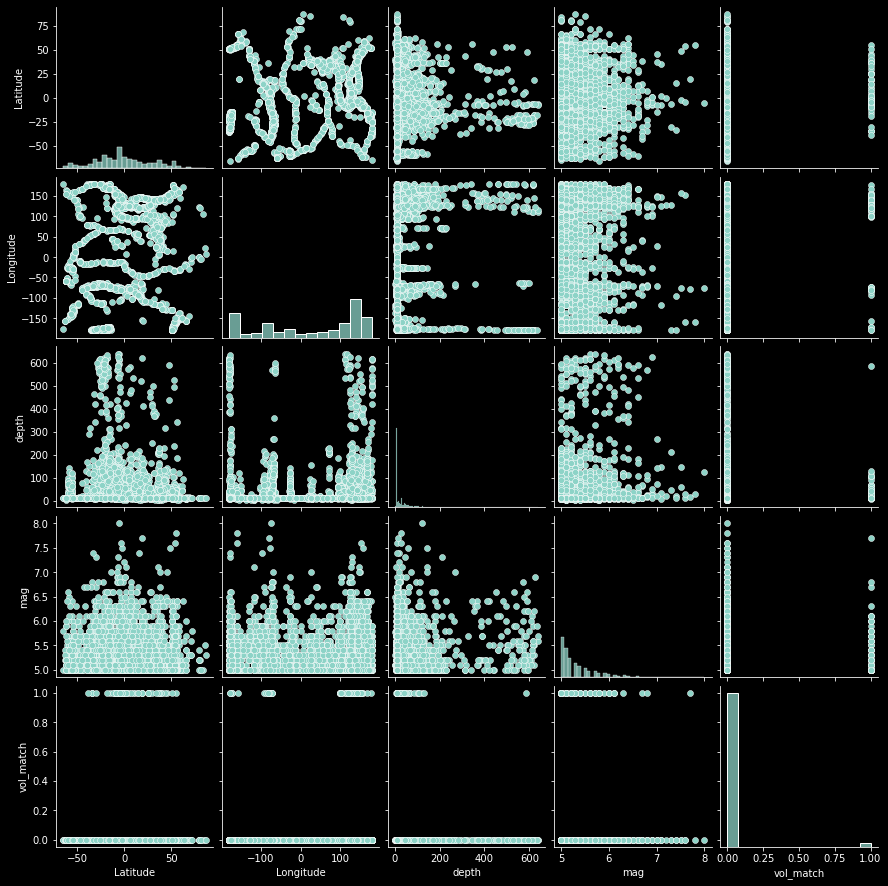

In [102]:
sns.pairplot(earthquakes19_20_ML_7)

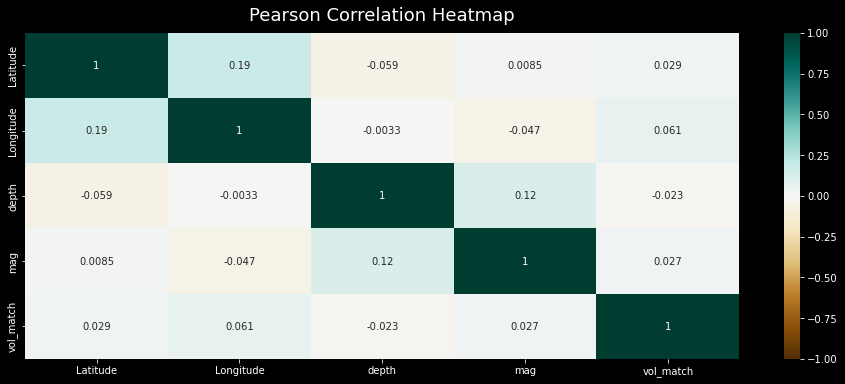

In [103]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(earthquakes19_20_ML_7.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

We can observe very weak correlation between features.

# Section 5: Modelling

##### Splitting dataframe to: independent and target variables:

In [104]:
# Store first two columns in an array X 
X = earthquakes19_20_ML_7.drop(['vol_match'], axis=1)

# Store the target variable as lable into an array y
y = earthquakes19_20_ML_7['vol_match']

# Display number of rows and columns
X.shape, y.shape

((3061, 4), (3061,))

##### Normalizing our data:

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(X)


In [107]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

0         1         2         3
0  2.100958 -1.428740 -0.079958 -0.839878
1 -0.284260  0.767423  0.098251 -0.839878
2 -0.044346  0.582064 -0.414586 -0.590910
3  1.467913  0.620219 -0.414586 -0.839878
4 -0.030949  0.899159 -0.176066 -0.839878

In [108]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2142, 4), (919, 4), (2142,), (919,))

In [110]:
y_train.value_counts()

0    2093
1      49
Name: vol_match, dtype: int64

In [111]:
y_test.value_counts()

0    894
1     25
Name: vol_match, dtype: int64

Checking again, confirming Class distribution in our X_train data. <br>
And can clearly see that the data is highly imbalanced.

##### One of the major issues dealing with highly imbalanced data relates to the metrics used to evaluate the model. <br>
Using simpler metrics like accuracy_score can be misleading. <br>
In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

Widely used solution to this problem is to do: Resampling. <br>
It is a technique for dealing with highly unbalanced datasets. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

There is many methods to do the resampling. <br>
I will use:

##### Over-sampling: SMOTE
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.<br>
(Alencar, R. (2018))

In [112]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before' , counter)

smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)

print('After' , counter)

Before Counter({0: 2093, 1: 49})
After Counter({0: 2093, 1: 2093})


## Train models:

##### Import ML libraries:

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

##### Setup cross validation and define error metrics:

In [114]:
# Setup cross validation folds
cv = KFold(n_splits=5, random_state=42, shuffle=True)

##### Setup models - SMOTE train data

In [115]:
kNN = KNeighborsClassifier(n_neighbors= 3)
knn_model = kNN.fit(X_train_sm, y_train_sm)

svc_model_0 = SVC(kernel='rbf')
svc_model_0 = svc_model_0.fit(X_train_sm, y_train_sm)

logreg_model=LogisticRegression()
logreg_model.fit(X_train_sm,y_train_sm)

LogisticRegression()

##### Setup models - imbalanced data

##### Models with default parameters

In [116]:
kNN = KNeighborsClassifier(n_neighbors= 3)
knn_model_unb = kNN.fit(X_train, y_train)

svc_model_0 = SVC(kernel='rbf')
svc_model_0_unb = svc_model_0.fit(X_train, y_train)

logreg_model=LogisticRegression()
logreg_model_unb = logreg_model.fit(X_train,y_train)

##### Tunning KNN and SVM

In [117]:
# Tunning of KNN 
leaf_size = list(range(25,35))
n_neighbors = list(range(1,10))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2_model = KNeighborsClassifier()
#Use GridSearch
knn_2_model = GridSearchCV(knn_2_model, hyperparameters, cv=cv)
knn_2_model.fit(X_train_sm, y_train_sm)
best_hyperparams_knn = knn_2_model.best_params_


# Tunning of SVM
hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
model = SVC(kernel="rbf")
svc_model = GridSearchCV(estimator = model, param_grid = hyper_params,scoring= 'accuracy',cv = cv,verbose = 1, 
                         return_train_score=True)    
svc_model.fit(X_train_sm, y_train_sm)
best_hyperparams_svc = svc_model.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


### Hyper tunning to find best parameters:

In [118]:
print("The best parameters for KNN model are: " , best_hyperparams_knn)
print("The best parameters for SVC model are: " , best_hyperparams_svc)

The best parameters for KNN model are:  {'leaf_size': 25, 'n_neighbors': 1, 'p': 1}
The best parameters for SVC model are:  {'C': 100, 'gamma': 0.01}


### Fitting best parameters to the KNN and SVC classifier:

#### To balanced data:

In [119]:
knn_2_model = KNeighborsClassifier(n_neighbors=1, leaf_size=25, p=1)
knn_2_model.fit(X_train_sm, y_train_sm)

svc_model = SVC(C=1000, gamma=0.01, kernel="rbf")
svc_model.fit(X_train_sm, y_train_sm.values.ravel())

SVC(C=1000, gamma=0.01)

#### To imbalanced data:

In [120]:
knn_2_model_unb = KNeighborsClassifier(n_neighbors=1, leaf_size=25, p=1)
knn_2_model_unb.fit(X_train, y_train)

svc_model_unb = SVC(C=100, gamma=0.01, kernel="rbf")
svc_model_unb.fit(X_train, y_train.values.ravel())

SVC(C=100, gamma=0.01)

### Test balanced models:

In [121]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn_2 = knn_2_model.predict(X_test)
y_pred_svc_0 = svc_model_0.predict(X_test)
y_pred_svc = svc_model.predict(X_test)
y_pred_logreg = logreg_model.predict(X_test)

### Test imbalanced models:

In [122]:
y_pred_knn_unb = knn_model_unb.predict(X_test)
y_pred_knn_2_unb = knn_2_model_unb.predict(X_test)
y_pred_svc_0_unb = svc_model_0.predict(X_test)
y_pred_svc_unb = svc_model_unb.predict(X_test)
y_pred_logreg_unb = logreg_model.predict(X_test)

## Evaluate models:

### Training and Testing score (balanced training data):

In [123]:
print('KNN Training set score: {:.4f}'.format(knn_model.score(X_train_sm, y_train_sm)))
print('KNN Test set score: {:.4f}'.format(knn_model.score(X_test, y_test)))
print('-------------------------------------------------')

print('KNN_2 Training set score: {:.4f}'.format(knn_2_model.score(X_train_sm, y_train_sm)))
print('KNN_2 Test set score: {:.4f}'.format(knn_2_model.score(X_test, y_test)))
print('-------------------------------------------------')

print('SVC Training set score: {:.4f}'.format(svc_model_0.score(X_train_sm, y_train_sm)))
print('SVC Test set score: {:.4f}'.format(svc_model_0.score(X_test, y_test)))
print('-------------------------------------------------')

print('SVC Training set score: {:.4f}'.format(svc_model.score(X_train_sm, y_train_sm)))
print('SVC Test set score: {:.4f}'.format(svc_model.score(X_test, y_test)))
print('-------------------------------------------------')

print('Log Reg Training set score: {:.4f}'.format(logreg_model.score(X_train_sm, y_train_sm)))
print('Log Reg Test set score: {:.4f}'.format(logreg_model.score(X_test, y_test)))

KNN Training set score: 0.9608
KNN Test set score: 0.8868
-------------------------------------------------
KNN_2 Training set score: 1.0000
KNN_2 Test set score: 0.9173
-------------------------------------------------
SVC Training set score: 0.5000
SVC Test set score: 0.9728
-------------------------------------------------
SVC Training set score: 0.9921
SVC Test set score: 0.9227
-------------------------------------------------
Log Reg Training set score: 0.5000
Log Reg Test set score: 0.9728


### Training and Testing score (imbalanced training data):

In [124]:
print('KNN_unbalanced Training set score: {:.4f}'.format(knn_model_unb.score(X_train, y_train)))
print('KNN_unbalanced Test set score: {:.4f}'.format(knn_model_unb.score(X_test, y_test)))
print('-------------------------------------------------')

print('KNN_2_unbalanced Training set score: {:.4f}'.format(knn_2_model_unb.score(X_train, y_train)))
print('KNN_2_unbalanced Test set score: {:.4f}'.format(knn_2_model_unb.score(X_test, y_test)))
print('-------------------------------------------------')

print('SVC_0_unbalanced Training set score: {:.4f}'.format(svc_model_0_unb.score(X_train, y_train)))
print('SVC_unbalanced Test set score: {:.4f}'.format(svc_model_0_unb.score(X_test, y_test)))
print('-------------------------------------------------')

print('SV_unbalancedC Training set score: {:.4f}'.format(svc_model_unb.score(X_train, y_train)))
print('SVC_unbalanced Test set score: {:.4f}'.format(svc_model_unb.score(X_test, y_test)))
print('-------------------------------------------------')

print('Log Reg_unbalanced Training set score: {:.4f}'.format(logreg_model_unb.score(X_train, y_train)))
print('Log Reg_unbalanced Test set score: {:.4f}'.format(logreg_model_unb.score(X_test, y_test)))

KNN_unbalanced Training set score: 0.9818
KNN_unbalanced Test set score: 0.9717
-------------------------------------------------
KNN_2_unbalanced Training set score: 1.0000
KNN_2_unbalanced Test set score: 0.9706
-------------------------------------------------
SVC_0_unbalanced Training set score: 0.9771
SVC_unbalanced Test set score: 0.9728
-------------------------------------------------
SV_unbalancedC Training set score: 0.9935
SVC_unbalanced Test set score: 0.9641
-------------------------------------------------
Log Reg_unbalanced Training set score: 0.9771
Log Reg_unbalanced Test set score: 0.9728


### Results of Classification Reports for balanced data:

In [125]:
print('KNN model_balanced')
print(classification_report(y_test, y_pred_knn))
print('-------------------------------------------------')

print('Knn model best parameters_balanced')
print(classification_report(y_test, y_pred_knn_2))
print('-------------------------------------------------')

print('SVC model_balanced')
print(classification_report(y_test, y_pred_svc_0))
print('-------------------------------------------------')

print('SVC model best parameters_balanced')
print(classification_report(y_test, y_pred_svc))
print('-------------------------------------------------')

print('Logistic Regression model_balanced')
print(classification_report(y_test, y_pred_logreg))

KNN model_balanced
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       894
           1       0.10      0.40      0.16        25

    accuracy                           0.89       919
   macro avg       0.54      0.65      0.55       919
weighted avg       0.96      0.89      0.92       919

-------------------------------------------------
Knn model best parameters_balanced
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       894
           1       0.12      0.32      0.17        25

    accuracy                           0.92       919
   macro avg       0.55      0.63      0.57       919
weighted avg       0.96      0.92      0.94       919

-------------------------------------------------
SVC model_balanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       894
           1       0.00      0.00      0.00        25

    accur

### Classification Report of models with unbalanced training data:

In [126]:
print('KNN model_imbalanced')
print(classification_report(y_test, y_pred_knn_unb))
print('-------------------------------------------------')

print('KNN model_tunned_imbalanced')
print(classification_report(y_test, y_pred_knn_2_unb))
print('-------------------------------------------------')

print('SVC model_imbalanced')
print(classification_report(y_test, y_pred_svc_0_unb))
print('-------------------------------------------------')

print('SVC model best parameters_imbalanced')
print(classification_report(y_test, y_pred_svc_unb))
print('-------------------------------------------------')

print('Logreg model_imbalanced')
print(classification_report(y_test, y_pred_logreg_unb))
print('-------------------------------------------------')

KNN model_imbalanced
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       894
           1       0.46      0.24      0.32        25

    accuracy                           0.97       919
   macro avg       0.72      0.62      0.65       919
weighted avg       0.96      0.97      0.97       919

-------------------------------------------------
KNN model_tunned_imbalanced
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       894
           1       0.43      0.24      0.31        25

    accuracy                           0.97       919
   macro avg       0.70      0.62      0.65       919
weighted avg       0.96      0.97      0.97       919

-------------------------------------------------
SVC model_imbalanced
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       894
           1       0.00      0.00      0.00        25

    accuracy

### Storing Metrics (balanced data):

In [127]:
knn_model_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_model_precision = metrics.precision_score(y_test, y_pred_knn)
knn_model_recall = metrics.recall_score(y_test, y_pred_knn)
knn_model_f1 = metrics.f1_score(y_test, y_pred_knn)

knn_model_2_accuracy = metrics.accuracy_score(y_test, y_pred_knn_2)
knn_model_2_precision = metrics.precision_score(y_test, y_pred_knn_2)
knn_model_2_recall = metrics.recall_score(y_test, y_pred_knn_2)
knn_model_2_f1 = metrics.f1_score(y_test, y_pred_knn_2)

svc_model_0_accuracy = metrics.accuracy_score(y_test, y_pred_svc_0)
svc_model_0_precision = metrics.precision_score(y_test, y_pred_svc_0)
svc_model_0_recall = metrics.recall_score(y_test, y_pred_svc_0)
svc_model_0_f1 = metrics.f1_score(y_test, y_pred_svc_0)

svc_model_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_model_precision = metrics.precision_score(y_test, y_pred_svc)
svc_model_recall = metrics.recall_score(y_test, y_pred_svc)
svc_model_f1 = metrics.f1_score(y_test, y_pred_svc)

logreg_model_accuracy = metrics.accuracy_score(y_test, y_pred_logreg)
logreg_model_precision = metrics.precision_score(y_test, y_pred_logreg)
logreg_model_recall = metrics.recall_score(y_test, y_pred_logreg)
logreg_model_f1 = metrics.f1_score(y_test, y_pred_logreg)

### Storing Metrics (imbalanced data):

In [128]:
knn_model_accuracy_unb = metrics.accuracy_score(y_test, y_pred_knn_unb)
knn_model_precision_unb = metrics.precision_score(y_test, y_pred_knn_unb)
knn_model_recall_unb = metrics.recall_score(y_test, y_pred_knn_unb)
knn_model_f1_unb = metrics.f1_score(y_test, y_pred_knn_unb)

knn_model_2_accuracy_unb = metrics.accuracy_score(y_test, y_pred_knn_2_unb)
knn_model_2_precision_unb = metrics.precision_score(y_test, y_pred_knn_2_unb)
knn_model_2_recall_unb = metrics.recall_score(y_test, y_pred_knn_2_unb)
knn_model_2_f1_unb = metrics.f1_score(y_test, y_pred_knn_2_unb)

svc_model_0_accuracy_unb = metrics.accuracy_score(y_test, y_pred_svc_0_unb)
svc_model_0_precision_unb = metrics.precision_score(y_test, y_pred_svc_0_unb)
svc_model_0_recall_unb = metrics.recall_score(y_test, y_pred_svc_0_unb)
svc_model_0_f1_unb = metrics.f1_score(y_test, y_pred_svc_0_unb)

svc_model_accuracy_unb = metrics.accuracy_score(y_test, y_pred_svc_unb)
svc_model_precision_unb = metrics.precision_score(y_test, y_pred_svc_unb)
svc_model_recall_unb = metrics.recall_score(y_test, y_pred_svc_unb)
svc_model_f1_unb = metrics.f1_score(y_test, y_pred_svc_unb)

logreg_model_accuracy_unb = metrics.accuracy_score(y_test, y_pred_logreg_unb)
logreg_model_precision_unb = metrics.precision_score(y_test, y_pred_logreg_unb)
logreg_model_recall_unb = metrics.recall_score(y_test, y_pred_logreg_unb)
logreg_model_f1_unb = metrics.f1_score(y_test, y_pred_logreg_unb)

### Results of Confusion Matrix on the Heatmap (balanced data):

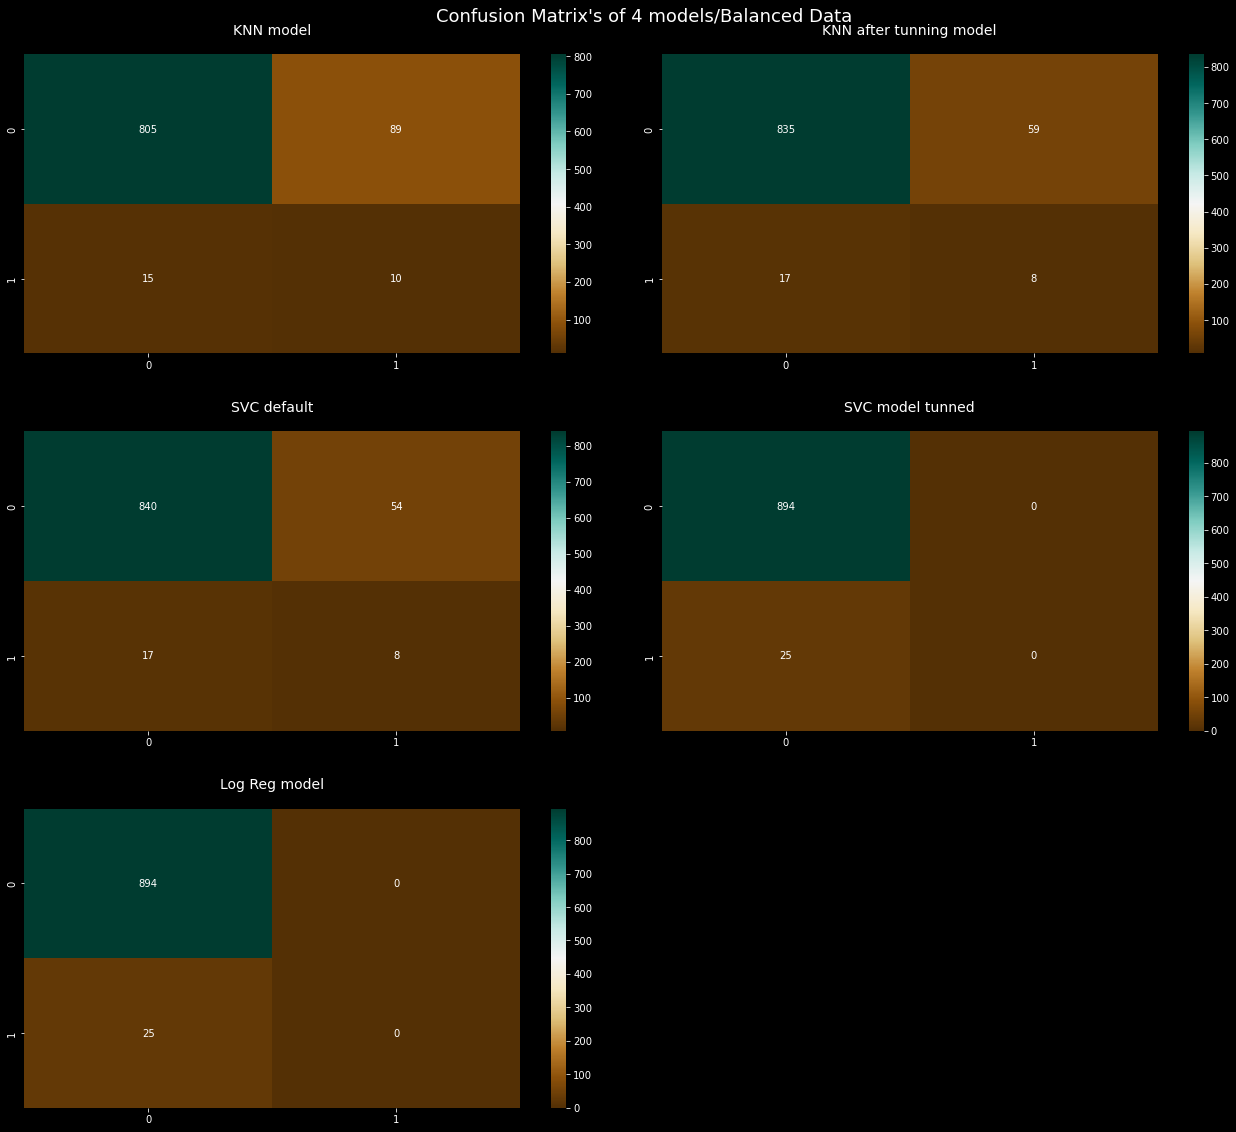

In [129]:
cm_1 = confusion_matrix(y_test, y_pred_knn)
cm_2 = confusion_matrix(y_test, y_pred_knn_2)
cm_3 = confusion_matrix(y_test, y_pred_svc)
cm_4 = confusion_matrix(y_test, y_pred_svc_0)
cm_5 = confusion_matrix(y_test, y_pred_logreg)

figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,16))
figure.suptitle("Confusion Matrix's of 4 models/Balanced Data",fontsize=18)
axes[2][1].set_visible(False)
axes[2][0].set_position([0.155,0.125,0.028,0.043])


sns.heatmap(cm_1, annot = True, fmt='g', cmap='BrBG', ax=axes[0,0])
axes[0,0].set_title('KNN model', fontsize=14, pad=20)

sns.heatmap(cm_2, annot = True, fmt='g', cmap='BrBG', ax=axes[0,1])
axes[0,1].set_title('KNN after tunning model', fontsize=14, pad=20)

sns.heatmap(cm_3, annot = True, fmt='g', cmap='BrBG', ax=axes[1,0])
axes[1,0].set_title('SVC default', fontsize=14, pad=20)

sns.heatmap(cm_4, annot = True, fmt='g', cmap='BrBG', ax=axes[1,1])
axes[1,1].set_title('SVC model tunned', fontsize=14, pad=20)

sns.heatmap(cm_5, annot = True, fmt='g', cmap='BrBG', ax=axes[2,0])
axes[2,0].set_title('Log Reg model', fontsize=14, pad=20)



figure.tight_layout(h_pad=3, w_pad=3)


### Sensitivity & Specificity on Balanced data

In [130]:
sensitivity_knn = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
print('Sensitivity KNN_model: ', sensitivity_knn )

specificity_knn = cm_1[1,1]/(cm_1[0,1]+cm_1[1,1])
print('Specificity KNN_model: ', specificity_knn)
print('-----------------------------------------------------------------')

sensitivity_knn_tunned = cm_2[0,0]/(cm_2[0,0]+cm_2[0,1])
print('Sensitivity KNN_model_tunned: ', sensitivity_knn_tunned )

specificity_knn_tunned = cm_2[1,1]/(cm_2[0,1]+cm_2[1,1])
print('Specificity KNN_model_tunned : ', specificity_knn_tunned)
print('-----------------------------------------------------------------')

sensitivity_svc = cm_3[0,0]/(cm_3[0,0]+cm_3[0,1])
print('Sensitivity SVC_model: ', sensitivity_svc )

specificity_svc = cm_3[1,1]/(cm_3[0,1]+cm_3[1,1])
print('Specificity SVC_model : ', specificity_svc)
print('-----------------------------------------------------------------')

sensitivity_svc_tunned = cm_4[0,0]/(cm_4[0,0]+cm_4[0,1])
print('Sensitivity SVC_model_tunned: ', sensitivity_svc_tunned )

specificity_svc_tunned = cm_4[1,1]/(cm_4[0,1]+cm_4[1,1])
print('Specificity SVC_model_tunned : ', specificity_svc_tunned)
print('-----------------------------------------------------------------')

sensitivity_log_reg = cm_5[0,0]/(cm_5[0,0]+cm_5[0,1])
print('Sensitivity Log_reg_model: ', sensitivity_log_reg )

specificity_log_reg = cm_5[1,1]/(cm_5[0,1]+cm_5[1,1])
print('Specificity Log_reg_model : ', specificity_log_reg)


Sensitivity KNN_model:  0.9004474272930649
Specificity KNN_model:  0.10101010101010101
-----------------------------------------------------------------
Sensitivity KNN_model_tunned:  0.9340044742729307
Specificity KNN_model_tunned :  0.11940298507462686
-----------------------------------------------------------------
Sensitivity SVC_model:  0.9395973154362416
Specificity SVC_model :  0.12903225806451613
-----------------------------------------------------------------
Sensitivity SVC_model_tunned:  1.0
Specificity SVC_model_tunned :  nan
-----------------------------------------------------------------
Sensitivity Log_reg_model:  1.0
Specificity Log_reg_model :  nan


### Results of Confusion Matrix on the Heatmap (imbalanced data):

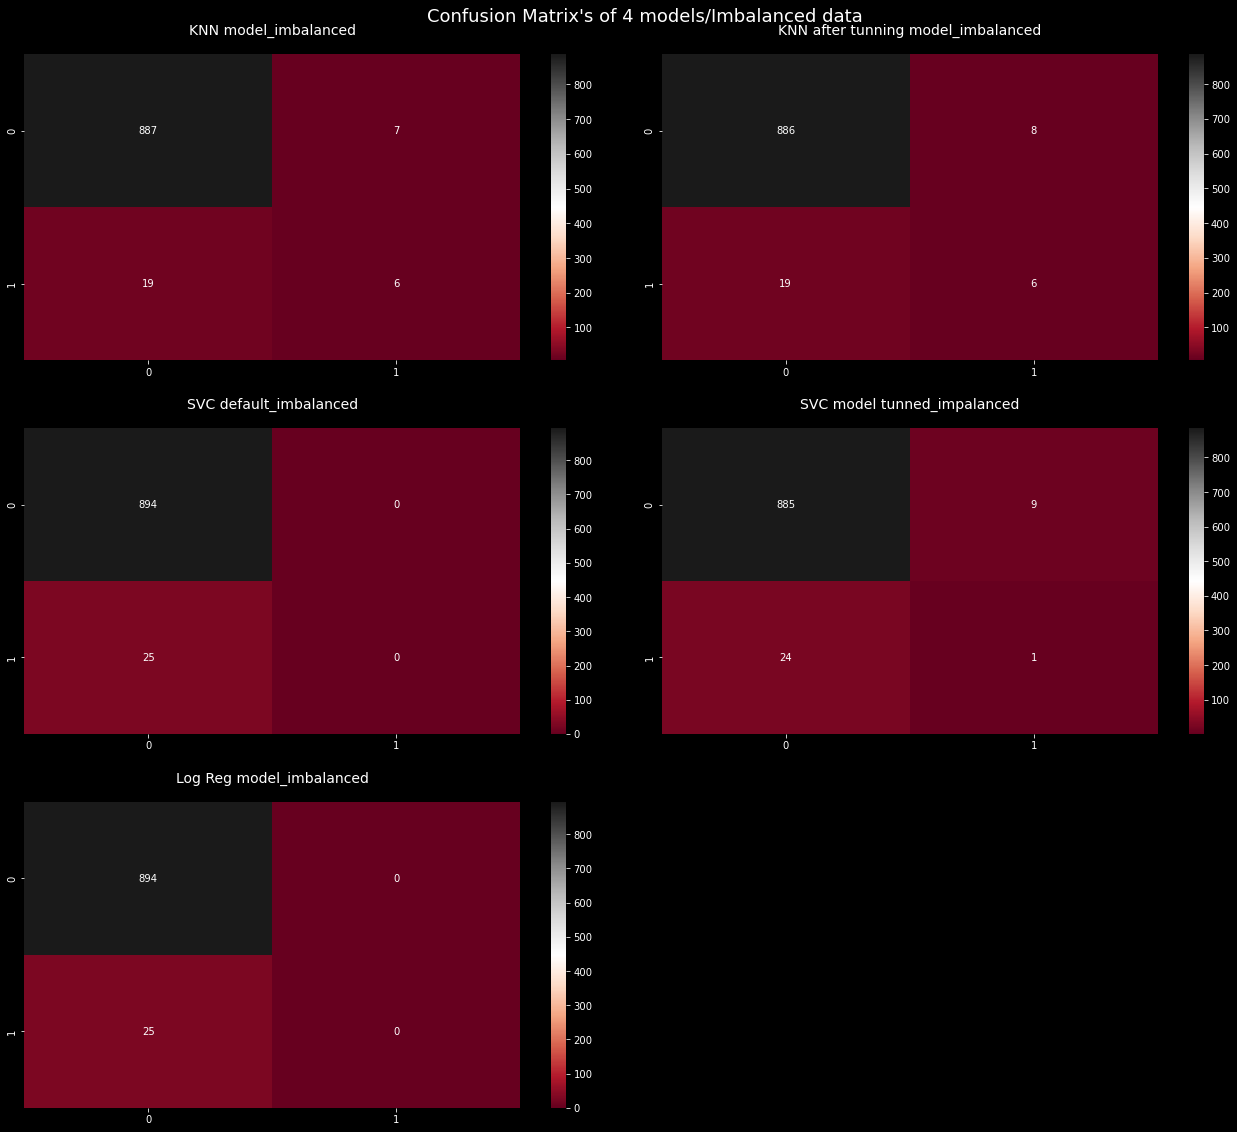

In [131]:
cm_1_unb = confusion_matrix(y_test, y_pred_knn_unb)
cm_2_unb = confusion_matrix(y_test, y_pred_knn_2_unb)
cm_3_unb = confusion_matrix(y_test, y_pred_svc_0_unb)
cm_4_unb = confusion_matrix(y_test, y_pred_svc_unb)
cm_5_unb = confusion_matrix(y_test, y_pred_logreg_unb)


figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,16))
figure.suptitle("Confusion Matrix's of 4 models/Imbalanced data",fontsize=18)
axes[2][1].set_visible(False)
axes[2][0].set_position([0.155,0.125,0.028,0.043])


sns.heatmap(cm_1_unb, annot = True, fmt='g', cmap='RdGy', ax=axes[0,0])
axes[0,0].set_title('KNN model_imbalanced', fontsize=14, pad=20)

sns.heatmap(cm_2_unb, annot = True, fmt='g', cmap='RdGy', ax=axes[0,1])
axes[0,1].set_title('KNN after tunning model_imbalanced', fontsize=14, pad=20)

sns.heatmap(cm_3_unb, annot = True, fmt='g', cmap='RdGy', ax=axes[1,0])
axes[1,0].set_title('SVC default_imbalanced', fontsize=14, pad=20)

sns.heatmap(cm_4_unb, annot = True, fmt='g', cmap='RdGy', ax=axes[1,1])
axes[1,1].set_title('SVC model tunned_impalanced', fontsize=14, pad=20)

sns.heatmap(cm_5_unb, annot = True, fmt='g', cmap='RdGy', ax=axes[2,0])
axes[2,0].set_title('Log Reg model_imbalanced', fontsize=14, pad=20)



figure.tight_layout(h_pad=2, w_pad=3)

### Sensitivity & Specificity on Imbalanced data

In [132]:
sensitivity_knn_unb = cm_1_unb[0,0]/(cm_1_unb[0,0]+cm_1_unb[0,1])
print('Sensitivity knn_unb_model_imbalanced: ', sensitivity_knn_unb )

specificity_knn_unb = cm_1_unb[1,1]/(cm_1_unb[1,1]+cm_1_unb[0,1])
print('Specificity knn_unb_model_imbalanced: ', specificity_knn_unb)
print('-----------------------------------------------------------------')

sensitivity_knn_unb_tunned = cm_2_unb[0,0]/(cm_2_unb[0,0]+cm_2_unb[0,1])
print('Sensitivity knn_unb_model_imbalanced_tunned: ', sensitivity_knn_unb_tunned )

specificity_knn_unb_tunned = cm_2_unb[1,1]/(cm_2_unb[1,1]+cm_2_unb[0,1])
print('Specificity knn_unb_model_imbalanced_tunned : ', specificity_knn_unb_tunned)
print('-----------------------------------------------------------------')

sensitivity_svc_unb = cm_3_unb[0,0]/(cm_3_unb[0,0]+cm_3_unb[0,1])
print('Sensitivity svc_unb_model_imbalanced: ', sensitivity_svc_unb )

specificity_svc_unb = cm_3_unb[1,1]/(cm_3_unb[1,1]+cm_3_unb[0,1])
print('Specificity svc_unb_model_imbalanced : ', specificity_svc_unb)
print('-----------------------------------------------------------------')

sensitivity_svc_unb_tunned = cm_4_unb[0,0]/(cm_4_unb[0,0]+cm_4_unb[0,1])
print('Sensitivity svc_unb_model_imbalanced_tunned: ', sensitivity_svc_unb_tunned )

specificity_svc_unb_tunned = cm_4_unb[1,1]/(cm_4_unb[0,1]+cm_4_unb[1,1])
print('Specificity svc_unb_model_imbalanced_tunned : ', specificity_svc_unb_tunned)
print('-----------------------------------------------------------------')

sensitivity_log_reg_unb = cm_5_unb[0,0]/(cm_5_unb[0,0]+cm_5_unb[0,1])
print('Sensitivity Log_reg_model_imbalanced: ', sensitivity_log_reg_unb )

specificity_log_reg_unb = cm_5_unb[1,1]/(cm_5_unb[0,1]+cm_5_unb[1,1])
print('Specificity Log_reg_model_imbalanced : ', specificity_log_reg_unb)

Sensitivity knn_unb_model_imbalanced:  0.9921700223713646
Specificity knn_unb_model_imbalanced:  0.46153846153846156
-----------------------------------------------------------------
Sensitivity knn_unb_model_imbalanced_tunned:  0.9910514541387024
Specificity knn_unb_model_imbalanced_tunned :  0.42857142857142855
-----------------------------------------------------------------
Sensitivity svc_unb_model_imbalanced:  1.0
Specificity svc_unb_model_imbalanced :  nan
-----------------------------------------------------------------
Sensitivity svc_unb_model_imbalanced_tunned:  0.9899328859060402
Specificity svc_unb_model_imbalanced_tunned :  0.1
-----------------------------------------------------------------
Sensitivity Log_reg_model_imbalanced:  1.0
Specificity Log_reg_model_imbalanced :  nan


### ROC Curve aff all Models with balanced data:

In [133]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

knn_pred_CV = cross_val_predict(knn_model, X_train_sm, y_train_sm, cv=cv)

knn_2_pred_CV = cross_val_predict(knn_2_model, X_train_sm, y_train_sm, cv=cv)

svc_0_pred_CV = cross_val_predict(svc_model_0, X_train_sm, y_train_sm, cv=cv, method='decision_function')

svc_pred_CV = cross_val_predict(svc_model, X_train_sm, y_train_sm, cv=cv, method="decision_function")

logreg_pred_CV = cross_val_predict(logreg_model, X_train_sm, y_train_sm, cv=cv)

In [134]:
roc_knn = roc_auc_score(y_train_sm, knn_pred_CV)
roc_knn_2 = roc_auc_score(y_train_sm,knn_2_pred_CV)
roc_svc_0 = roc_auc_score(y_train_sm, svc_0_pred_CV)
roc_svc = roc_auc_score(y_train_sm, svc_pred_CV)
roc_logreg = roc_auc_score(y_train_sm, logreg_pred_CV)

print('KNN ROC Area Under the Curve Score: ', roc_auc_score(y_train_sm, knn_pred_CV))
print('-------------------------------------------------------------------------------')
print('KNN tunned ROC Area Under the Curve Score: ', roc_auc_score(y_train_sm,knn_2_pred_CV))
print('-------------------------------------------------------------------------------')
print('Support Vector Machine  ROC Area Under the Curve Score: ', roc_auc_score(y_train_sm, svc_0_pred_CV))
print('-------------------------------------------------------------------------------')
print('SVM best params ROC Area Under the Curve Score: ', roc_auc_score(y_train_sm, svc_pred_CV))
print('-------------------------------------------------------------------------------')
print('Logistic Regression ROC Area Under the Curve Score: ', roc_auc_score(y_train_sm, logreg_pred_CV))
print('-------------------------------------------------------------------------------')

KNN ROC Area Under the Curve Score:  0.9180602006688963
-------------------------------------------------------------------------------
KNN tunned ROC Area Under the Curve Score:  0.9395604395604396
-------------------------------------------------------------------------------
Support Vector Machine  ROC Area Under the Curve Score:  0.7475506483171785
-------------------------------------------------------------------------------
SVM best params ROC Area Under the Curve Score:  0.9654060391508198
-------------------------------------------------------------------------------
Logistic Regression ROC Area Under the Curve Score:  0.6328236980410893
-------------------------------------------------------------------------------


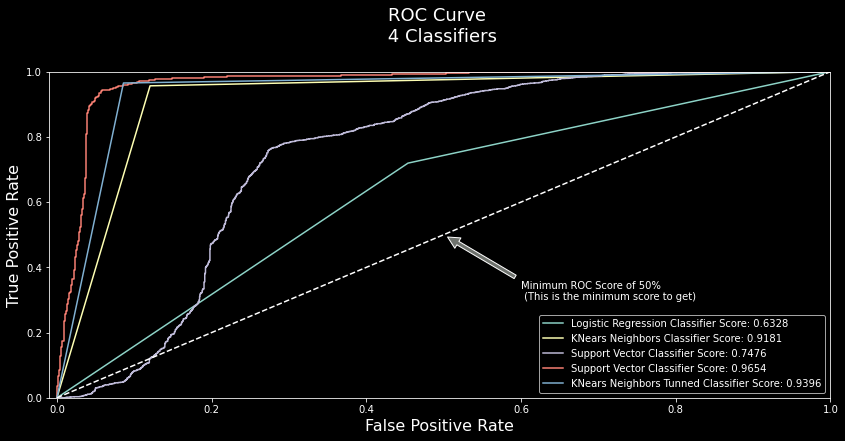

In [135]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train_sm, logreg_pred_CV)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_train_sm, knn_pred_CV)
svc_0_fpr, svc_0_tpr, svc_0_threshold = roc_curve(y_train_sm, svc_0_pred_CV)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train_sm, svc_pred_CV)
knn_2_fpr, knn_2_tpr, knn_2_threshold = roc_curve(y_train_sm, knn_2_pred_CV)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_0_fpr, svc_0_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(14,6))
    plt.title('ROC Curve \n 4 Classifiers', fontsize=18, pad=30)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train_sm, logreg_pred_CV)))
    plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train_sm, knn_pred_CV)))
    plt.plot(svc_0_fpr, svc_0_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train_sm, svc_0_pred_CV)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train_sm, svc_pred_CV)))
    plt.plot(knn_2_fpr, knn_2_tpr, label='KNears Neighbors Tunned Classifier Score: {:.4f}'.format(roc_auc_score(y_train_sm, knn_2_pred_CV)))
    plt.plot([0, 1], [0, 1], 'k--', color='white')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knn_fpr, knn_tpr, svc_0_fpr, svc_0_tpr, svc_fpr, svc_tpr, knn_2_fpr, knn_2_tpr)
plt.show()


# code source: https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

### ROC Curve aff all Models with imbalanced data:

In [136]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

knn_pred_CV_unb = cross_val_predict(knn_model_unb, X_train, y_train, cv=cv)

knn_2_pred_CV_unb = cross_val_predict(knn_2_model_unb, X_train, y_train, cv=cv)

svc_0_pred_CV_unb = cross_val_predict(svc_model_0_unb, X_train, y_train, cv=cv, method='decision_function')

svc_pred_CV_unb = cross_val_predict(svc_model_unb, X_train, y_train, cv=cv, method="decision_function")

logreg_pred_CV_unb = cross_val_predict(logreg_model_unb, X_train, y_train, cv=cv)

In [137]:
roc_knn_unb = roc_auc_score(y_train, knn_pred_CV_unb)
roc_knn_2_unb = roc_auc_score(y_train,knn_2_pred_CV_unb)
roc_svc_0_unb = roc_auc_score(y_train, svc_0_pred_CV_unb)
roc_svc_unb = roc_auc_score(y_train, svc_pred_CV_unb)
roc_logreg_unb = roc_auc_score(y_train, logreg_pred_CV_unb)

print('KNN ROC Area Under the Curve Score: ', roc_auc_score(y_train, knn_pred_CV_unb))
print('-------------------------------------------------------------------------------')
print('KNN tunned ROC Area Under the Curve Score: ', roc_auc_score(y_train,knn_2_pred_CV_unb))
print('-------------------------------------------------------------------------------')
print('Support Vector Machine  ROC Area Under the Curve Score: ', roc_auc_score(y_train, svc_0_pred_CV_unb))
print('-------------------------------------------------------------------------------')
print('SVM best params ROC Area Under the Curve Score: ', roc_auc_score(y_train, svc_pred_CV_unb))
print('-------------------------------------------------------------------------------')
print('Logistic Regression ROC Area Under the Curve Score: ', roc_auc_score(y_train, logreg_pred_CV_unb))
print('-------------------------------------------------------------------------------')

KNN ROC Area Under the Curve Score:  0.5374718449252611
-------------------------------------------------------------------------------
KNN tunned ROC Area Under the Curve Score:  0.5597228858098423
-------------------------------------------------------------------------------
Support Vector Machine  ROC Area Under the Curve Score:  0.6214105326793881
-------------------------------------------------------------------------------
SVM best params ROC Area Under the Curve Score:  0.6053072925300076
-------------------------------------------------------------------------------
Logistic Regression ROC Area Under the Curve Score:  0.5
-------------------------------------------------------------------------------


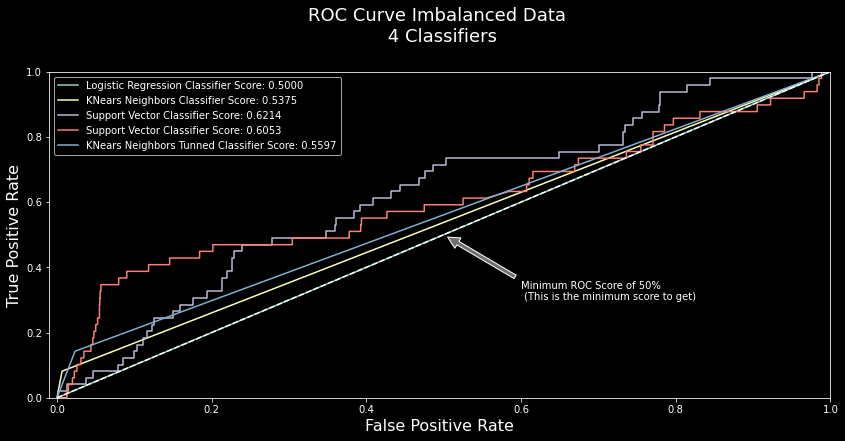

In [138]:
log_fpr_unb, log_tpr, log_thresold = roc_curve(y_train, logreg_pred_CV_unb)
knn_fpr_unb, knn_tpr, knn_threshold_unb = roc_curve(y_train, knn_pred_CV_unb)
svc_0_fpr_unb, svc_0_tpr, svc_0_threshold_unb = roc_curve(y_train, svc_0_pred_CV_unb)
svc_fpr_unb, svc_tpr, svc_threshold_unb = roc_curve(y_train, svc_pred_CV_unb)
knn_2_fpr_unb, knn_2_tpr, knn_2_threshold_unb = roc_curve(y_train, knn_2_pred_CV_unb)


def graph_roc_curve_multiple(log_fpr_unb, log_tpr, knear_fpr_unb, knear_tpr, svc_0_fpr_unb, svc_0_tpr, svc_fpr_unb, svc_tpr, tree_fpr_unb, tree_tpr):
    plt.figure(figsize=(14,6))
    plt.title('ROC Curve Imbalanced Data \n 4 Classifiers', fontsize=18, pad=30)
    plt.plot(log_fpr_unb, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, logreg_pred_CV_unb)))
    plt.plot(knn_fpr_unb, knn_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knn_pred_CV_unb)))
    plt.plot(svc_0_fpr_unb, svc_0_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_0_pred_CV_unb)))
    plt.plot(svc_fpr_unb, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred_CV_unb)))
    plt.plot(knn_2_fpr_unb, knn_2_tpr, label='KNears Neighbors Tunned Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knn_2_pred_CV_unb)))
    plt.plot([0, 1], [0, 1], 'k--', color='white')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    
    plt.legend()
    
graph_roc_curve_multiple(log_fpr_unb, log_tpr, knn_fpr_unb, knn_tpr, svc_0_fpr_unb, svc_0_tpr, svc_fpr_unb, svc_tpr, knn_2_fpr_unb, knn_2_tpr)
plt.show()


# code source: https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

# Section 6: Comparison of all models:

In [139]:
Model_Comparison = pd.DataFrame({
'Model' : ['KNN', 'KNN_tunned', 'SVM', 'SVM_tunned', 'Log_Reg',
           'KNN_unb', 'KNN_tunned_unb', 'SVM_unb', 'SVM_tunned_unb', 'Log_Reg_unb'],
'Accuracy Score' : [knn_model_accuracy, knn_model_2_accuracy, svc_model_0_accuracy, svc_model_accuracy, logreg_model_accuracy,
                   knn_model_accuracy_unb, knn_model_2_accuracy_unb, svc_model_0_accuracy_unb, svc_model_accuracy_unb,
                   logreg_model_accuracy_unb],
'Precision' : [knn_model_precision, knn_model_2_precision, svc_model_0_precision, svc_model_precision, logreg_model_precision,
              knn_model_precision_unb, knn_model_2_precision_unb, svc_model_0_precision_unb, svc_model_precision_unb, 
               logreg_model_precision_unb],
'Recall': [knn_model_recall, knn_model_2_recall, svc_model_0_recall, svc_model_recall, logreg_model_recall,
          knn_model_recall_unb, knn_model_2_recall_unb,svc_model_0_recall_unb, svc_model_recall_unb, logreg_model_recall_unb],
'Roc_auc': [roc_knn, roc_knn_2, roc_svc_0, roc_svc, roc_logreg,
           roc_knn_unb, roc_knn_2_unb, roc_svc_0_unb, roc_svc_unb, roc_logreg_unb],
'Sensitivity' : [sensitivity_knn, sensitivity_knn_tunned, sensitivity_svc, sensitivity_svc_tunned, sensitivity_log_reg,
                sensitivity_knn_unb, sensitivity_knn_unb_tunned, sensitivity_svc_unb, sensitivity_svc_unb_tunned, 
                 sensitivity_log_reg_unb],
'Specificity' :[specificity_knn, specificity_knn_tunned, specificity_svc, specificity_svc_tunned, specificity_log_reg,
               specificity_knn_unb, specificity_knn_unb_tunned, specificity_svc_unb, specificity_svc_unb_tunned, 
                specificity_log_reg_unb]
})
Model_Comparison_df = Model_Comparison.sort_values(by='Roc_auc', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

Model  Accuracy Score  Precision  Recall   Roc_auc  Sensitivity  \
0      SVM_tunned        0.922742   0.129032    0.32  0.965406     1.000000   
1      KNN_tunned        0.917301   0.119403    0.32  0.939560     0.934004   
2             KNN        0.886834   0.101010    0.40  0.918060     0.900447   
3             SVM        0.972797   0.000000    0.00  0.747551     0.939597   
4         Log_Reg        0.972797   0.000000    0.00  0.632824     1.000000   
5         SVM_unb        0.972797   0.000000    0.00  0.621411     1.000000   
6  SVM_tunned_unb        0.964091   0.100000    0.04  0.605307     0.989933   
7  KNN_tunned_unb        0.970620   0.428571    0.24  0.559723     0.991051   
8         KNN_unb        0.971708   0.461538    0.24  0.537472     0.992170   
9     Log_Reg_unb        0.972797   0.000000    0.00  0.500000     1.000000   

   Specificity  
0          NaN  
1     0.119403  
2     0.101010  
3     0.129032  
4          NaN  
5          NaN  
6     0.100000  
7     0.428571  
8     0.461538  
9          NaN

Text(0.5, 1.0, 'Model Comparison')

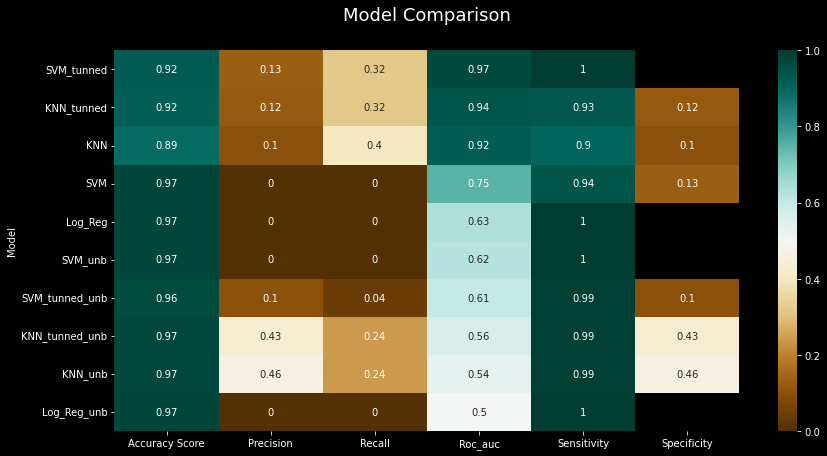

In [140]:
plt.figure(figsize=(14,7))
sns.heatmap(Model_Comparison_df, annot=True, cmap='BrBG')
plt.title('Model Comparison', fontsize=18, pad=30)

We have analyzed models on both training data after SMOTE and training data which is highly imbalanced. <br>
We have taken mainly into consideration <b> ROC AUC score <b>. <br>
    
We have consider suggestion of Jason Brownlee PhD from his article: "Tour of Evaluation Metrics for Imbalanced Classification".
    
"Reporting classification accuracy for a severely imbalanced classification problem could be dangerously misleading. 
Although widely used, classification accuracy is almost universally inappropriate for imbalanced classification. The reason is, a high accuracy (or low error) is achievable by a no skill model that only predicts the majority class."

Ranking Metrics for Imbalanced Classification:  The most commonly used ranking metric is the ROC Curve or ROC Analysis.

<b> A ROC curve </b> is a diagnostic plot for summarizing the behavior of a model by calculating the false positive rate and true positive rate for a set of predictions by the model under different thresholds.

<b> Also we have considered results of Sensitivity and Specificity. </b>
- <b> Sensitivity </b> - ability to recognise correctly positive results. (TP/(TP+FN)
- <b> Specificity </b> - ability to identify correctly negative results.  (TN/(TN+FP)
    
Models which have been fitted to Balanced data (after SMOTE) recognized the True Negative and True Positive better, higher number of them.  <br>
We were afraid that higher accuracy and precision for the models with imbalanced data could be biased and result in training data learning from highly imbalanced examples.

### In our opinion the KNN_tunned and KNN have best, most trustful results: very high ROC auc, good sensitivity and fair specificity.<br>
#### SVM_tunned has poorly recognised negative results.

Our work focuses on the relationship between earthquakes and volcanoes and therefore all variables that do not relate to event date, event location and main earthquake quantification metrics (magnitude) have been removed from the dataframe.

### References:
Alencar, R., 2018. Resampling strategies for imbalanced datasets. [online] Available at: <https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook>  [Accessed Mar 10th, 2022].

Brownlee, J., 2015. 8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/> [Accessed 12 May 2022].

Radečić , D. 2020. Here’s How To Calculate Distance Between 2 Geolocations in Python. [online] Available at: <https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4> [Accessed 14 May 2022].